# Data Analysis
Within this notebook we are going to perform the analysis and cleaning of the H dataset.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
from dateutil.relativedelta import relativedelta

Import of the dataset and first measures:

In [181]:
data_0 = pd.read_excel('../Data/Product Sales - All Seasons Updated.xlsx', 'DATA')
data_0.columns.values[8] = 'Originals'
data_0

Description Seasonality  Month  Year  Week No    Channel  \
0       Antoinette         OLD    NaN  2017        1  DE Direct   
1           Astrid         OLD    NaN  2017        1  DE Direct   
2        Bridgette         OLD    NaN  2017        1  DE Direct   
3        Charmaine          SS    NaN  2017        1  DE Direct   
4            Chile          SS    NaN  2017        1  DE Direct   
...            ...         ...    ...   ...      ...        ...   
378111     Waltham          AW    NaN  2021       50  Wholesale   
378112     Whisper          AW    NaN  2021       50  Wholesale   
378113     Whisper        CONT    NaN  2021       50  Wholesale   
378114        Wrap          AW    NaN  2021       50  Wholesale   
378115        Wrap        CONT    NaN  2021       50  Wholesale   

              WSSI Category LIMITED EDITION STYLES Originals        Source  \
0       Womens Formal Shoes    NON-LIMITED EDITION        No           NaN   
1       Womens Active Shoes    NON-LIMITED EDITION        No           NaN   
2       Womens Formal Shoes    NON-LIMITED EDITION        No           NaN   
3       Womens Formal Shoes    NON-LIMITED EDITION        No           NaN   
4       Womens Casual Shoes    NON-LIMITED EDITION        No           NaN   
...                     ...                    ...       ...           ...   
378111  Womens Casual Boots    NON-LIMITED EDITION       NaN  MANUFACTURED   
378112  Womens Casual Boots    NON-LIMITED EDITION       NaN  MANUFACTURED   
378113  Womens Casual Boots    NON-LIMITED EDITION       NaN  MANUFACTURED   
378114      Womens Slippers    NON-LIMITED EDITION       NaN  MANUFACTURED   
378115      Womens Slippers    NON-LIMITED EDITION       NaN  MANUFACTURED   

                RRP     MARKDOWN  GROSS REVENUE  NET DISCOUNT  NET REVENUE  \
0       -151.049034   -25.889034        -125.16          0.00      -125.16   
1         61.275260    14.415260          46.86          0.00        46.86   
2        -75.524517   -38.124517         -37.40          0.00       -37.40   
3         71.026446     0.206446          70.82          0.00        70.82   
4         71.026446     0.206446          70.82          0.00        70.82   
...             ...          ...            ...           ...          ...   
378111  1750.000000   700.000000        1050.00          0.00      1050.00   
378112  5241.666642  1868.276642        3373.39          0.00      3373.39   
378113  5879.166639  1310.606639        4568.56          3.89      4564.67   
378114  1376.666648   559.906648         816.76          0.00       816.76   
378115  1671.666654   708.046654         963.62        129.80       833.82   

        NET VOLUME  NET MARGIN Season Report     COST  
0             -2.0      -93.19          SS17   -31.97  
1              1.0       31.33          SS17    15.53  
2             -1.0      -19.89          SS17   -17.51  
3              1.0       53.64          SS17    17.18  
4              1.0       56.74          SS17    14.08  
...            ...         ...           ...      ...  
378111        20.0      590.64          AW21   459.36  
378112        74.0     1909.77          AW21  1463.62  
378113        83.0     2980.36          AW21  1584.31  
378114        28.0      405.44          AW21   411.32  
378115        34.0      334.36          AW21   499.46  

[378116 rows x 19 columns]

In [182]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378116 entries, 0 to 378115
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Description             378116 non-null  object 
 1   Seasonality             378116 non-null  object 
 2   Month                   0 non-null       float64
 3   Year                    378116 non-null  int64  
 4   Week No                 378116 non-null  int64  
 5   Channel                 378116 non-null  object 
 6   WSSI Category           378116 non-null  object 
 7   LIMITED EDITION STYLES  377136 non-null  object 
 8   Originals               310231 non-null  object 
 9   Source                  273953 non-null  object 
 10  RRP                     378116 non-null  float64
 11  MARKDOWN                378116 non-null  float64
 12  GROSS REVENUE           378116 non-null  float64
 13  NET DISCOUNT            378116 non-null  float64
 14  NET REVENUE         

In [183]:
data_0.describe()

Month           Year        Week No            RRP       MARKDOWN  \
count    0.0  378116.000000  378116.000000  378116.000000  378116.000000   
mean     NaN    2018.730876      26.217240    1530.201495     342.495694   
std      NaN       1.392340      14.878021    4858.028669    1616.195299   
min      NaN    2017.000000       1.000000   -7654.775555  -71296.960000   
25%      NaN    2017.000000      13.000000      54.166666      -0.000001   
50%      NaN    2019.000000      27.000000     172.500000      31.666666   
75%      NaN    2020.000000      39.000000     974.999990     141.663330   
max      NaN    2021.000000      53.000000  235344.716151  122457.500000   

       GROSS REVENUE   NET DISCOUNT    NET REVENUE     NET VOLUME  \
count  378116.000000  378116.000000  378116.000000  378116.000000   
mean     1187.705801     195.250759     992.455042      28.958560   
std      4026.339206    1129.849590    3225.979491     100.473351   
min     -6784.372533   -4972.943834   -4475.200000    -140.000000   
25%        24.990000       0.000000      21.700000       1.000000   
50%       100.000000       0.000000      90.406511       3.000000   
75%       633.330000      45.318744     549.405000      18.000000   
max    205112.400000  124614.480000  151871.550000    9281.000000   

          NET MARGIN           COST  
count  378116.000000  378116.000000  
mean      582.118852     410.336191  
std      2041.492585    1304.210260  
min    -66463.020000   -3408.100000  
25%         4.334692      14.400000  
50%        39.390000      45.510000  
75%       279.899669     253.350000  
max     99379.140000   84780.000000

In [184]:
data_0.nunique()

Description                 1345
Seasonality                    5
Month                          0
Year                           5
Week No                       53
Channel                       15
WSSI Category                 24
LIMITED EDITION STYLES         2
Originals                      3
Source                         2
RRP                        97090
MARKDOWN                  176666
GROSS REVENUE             157700
NET DISCOUNT              108506
NET REVENUE               174705
NET VOLUME                  1559
NET MARGIN                171778
Season Report                 10
COST                      186387
dtype: int64

Let's see which values do we have for each field:

In [185]:
for feat in data_0.columns:
    print(feat,': ',data_0[feat].unique())
    print('')

Description :  ['Antoinette' 'Astrid' 'Bridgette' ... 'Lounge' 'Birch' 'Melody II']

Seasonality :  ['OLD' 'SS' 'AW' 'CONT' ' NO SEASONALITY']

Month :  [nan]

Year :  [2017 2018 2019 2020 2021]

Week No :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]

Channel :  ['DE Direct' 'Retail - Concessions' 'Retail - Full Price'
 'Retail - Outlet' 'UK Direct' 'US Direct' 'Wholesale' 'Euro Direct'
 'Digital Partnerships' 'EU Direct' 'Retail' 'UK Offline' 'UK Online'
 'US Offline' 'US Online']

WSSI Category :  ['Womens Formal Shoes' 'Womens Active Shoes' 'Womens Casual Shoes'
 'Womens Slippers' 'Mens Casual Shoes' 'Womens Formal Sandals'
 'Womens Casual Sandals' 'Womens Goretex' 'Womens Deck Shoes'
 'Acc Handbags and Purses' 'Mens Formal Shoes' 'Womens Casual Boots'
 'Womens Formal Boots' 'Mens Slippers' 'Womens Smart Casual Shoes'
 ' NO CATEGORY' 'Shoe Care' 'Other Accessories' 

In [186]:
data = data_0

## Data Cleaning
### Convert to Unit fields
Currency related fields contain the sum of the quantity of product sold that week. Since this field contains information from the amount of sales that we want to predicte we need to get the value per unit. We need to take into account some of the sales are 0 for some weeks.


In [187]:
#We set the the variables with individual values since for future prediction we won't know how many product will be selled.
#Also to avoid the algorithm to learn the values by those fields
data['PRICE'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['NET REVENUE'],data['NET REVENUE']/data['NET VOLUME']])
data['COST_U'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['COST'],data['COST']/data['NET VOLUME']])
data['MARKDOWN_U'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['MARKDOWN'],data['MARKDOWN']/data['NET VOLUME']])
data['RRP_U'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['RRP'],data['RRP']/data['NET VOLUME']])
data['MARGIN_U'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['NET MARGIN'],data['NET MARGIN']/data['NET VOLUME']])
data['DISCOUNT_U'] = np.select( [(data['NET VOLUME']== 0.),(data['NET VOLUME']!= 0.)],[data['NET DISCOUNT'],data['NET DISCOUNT']/data['NET VOLUME']])
# we then remove the collective fields
data = data.drop(['NET REVENUE','NET MARGIN','RRP','MARKDOWN','COST','NET DISCOUNT'],axis=1)

### Unnecessary fields
We can drop some of the features that are not useful for our prediction:

In [188]:
data = data.drop(['Month','GROSS REVENUE','Season Report'],axis=1)

### Nan values
We convert Hotter Originals field into a boolean assuming that NAN corresponds to a non originsal product.
Sourcecategorical variable will have a new NONE for those empty records

In [189]:
data['Source'] = data['Source'].fillna('NONE')
data['Originals'] = [1. if x=='Yes' else 0 for x in data['Originals']]

### Standarization
We will convert LIMITED EDITION STYLES into a boolean field and unify the typos on the Goretex categories

In [190]:
data['LIMITED EDITION STYLES'] = [1. if x=='LIMITED EDITION' else 0 for x in data['LIMITED EDITION STYLES']]
data['WSSI Category'] = data['WSSI Category'].replace({'Womens GoreTex':'Womens Goretex', 'Mens GoreTex':'Mens Goretex'})

### Additional fields
There are some additional fields that we will add for future algorithms. We first add a specific attribute based on the gender and style of the product category. We are also creating 4 lag variables with the information of the sales in the previous weeks.

In [191]:
data['gender'] = np.select( [(data['WSSI Category'].str.contains('Womens')),
                             (~data['WSSI Category'].str.contains('Womens'))&
                             (data['WSSI Category'].str.contains('Mens')),
                             (~data['WSSI Category'].str.contains('Mens'))&
                             (~data['WSSI Category'].str.contains('Womens')),
                            ],['Womens','Mens','Unisex'])
data['style'] = np.select( [(data['WSSI Category'].str.contains('Boots')),
                            (data['WSSI Category'].str.contains('Sandals')),
                            (data['WSSI Category'].str.contains('Shoes')),
                            (data['WSSI Category'].str.contains('Slippers')),
                            (data['WSSI Category'].str.contains('Care')),
                            (data['WSSI Category'].str.contains('Goretex')),
                            (data['WSSI Category'].str.contains('Acc')),
                           ],['Boots','Sandals','Shoes','Slippers','Care','Goretex','Acc'])
data

Description Seasonality  Year  Week No    Channel        WSSI Category  \
0       Antoinette         OLD  2017        1  DE Direct  Womens Formal Shoes   
1           Astrid         OLD  2017        1  DE Direct  Womens Active Shoes   
2        Bridgette         OLD  2017        1  DE Direct  Womens Formal Shoes   
3        Charmaine          SS  2017        1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017        1  DE Direct  Womens Casual Shoes   
...            ...         ...   ...      ...        ...                  ...   
378111     Waltham          AW  2021       50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021       50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021       50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021       50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021       50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  NET VOLUME  \
0                          0.0        0.0          NONE        -2.0   
1                          0.0        0.0          NONE         1.0   
2                          0.0        0.0          NONE        -1.0   
3                          0.0        0.0          NONE         1.0   
4                          0.0        0.0          NONE         1.0   
...                        ...        ...           ...         ...   
378111                     0.0        0.0  MANUFACTURED        20.0   
378112                     0.0        0.0  MANUFACTURED        74.0   
378113                     0.0        0.0  MANUFACTURED        83.0   
378114                     0.0        0.0  MANUFACTURED        28.0   
378115                     0.0        0.0  MANUFACTURED        34.0   

            PRICE     COST_U  MARKDOWN_U      RRP_U   MARGIN_U  DISCOUNT_U  \
0       62.580000  15.985000   12.944517  75.524517  46.595000   -0.000000   
1       46.860000  15.530000   14.415260  61.275260  31.330000    0.000000   
2       37.400000  17.510000   38.124517  75.524517  19.890000   -0.000000   
3       70.820000  17.180000    0.206446  71.026446  53.640000    0.000000   
4       70.820000  14.080000    0.206446  71.026446  56.740000    0.000000   
...           ...        ...         ...        ...        ...         ...   
378111  52.500000  22.968000   35.000000  87.500000  29.532000    0.000000   
378112  45.586351  19.778649   25.246982  70.833333  25.807703    0.000000   
378113  54.996024  19.088072   15.790441  70.833333  35.907952    0.046867   
378114  29.170000  14.690000   19.996666  49.166666  14.480000    0.000000   
378115  24.524118  14.690000   20.824902  49.166666   9.834118    3.817647   

        gender     style  
0       Womens     Shoes  
1       Womens     Shoes  
2       Womens     Shoes  
3       Womens     Shoes  
4       Womens     Shoes  
...        ...       ...  
378111  Womens     Boots  
378112  Womens     Boots  
378113  Womens     Boots  
378114  Womens  Slippers  
378115  Womens  Slippers  

[378116 rows x 18 columns]

In [192]:
# rename some columns names
data = data.rename(columns={'NET VOLUME': 'sales', 'Week No': 'Week'})

We want to add some information regarding previous weeks, in this case we take the lag variable of previous week and 2 previous weeks and we also create the trend of the last 2 to 4 weeks.

In [193]:
data['prev_sales'] = data.groupby(by =['Description','Year','Seasonality','Channel','WSSI Category',
                      'LIMITED EDITION STYLES','Originals','style','gender',
                      'Source'], as_index=False)['sales'].shift()
data['prev_sales2'] = data.groupby(by =['Description','Year','Seasonality','Channel','WSSI Category',
                      'LIMITED EDITION STYLES','Originals','style','gender',
                      'Source'], as_index=False)['sales'].shift(2)
data['prev_sales3'] = data.groupby(by =['Description','Year','Seasonality','Channel','WSSI Category',
                      'LIMITED EDITION STYLES','Originals','style','gender',
                      'Source'], as_index=False)['sales'].shift(3)
data['prev_sales4'] = data.groupby(by =['Description','Year','Seasonality','Channel','WSSI Category',
                      'LIMITED EDITION STYLES','Originals','style','gender',
                      'Source'], as_index=False)['sales'].shift(4)



data['prev_sales'] = data['prev_sales'].fillna(0)
data['prev_sales2'] = data['prev_sales2'].fillna(0)
data['prev_sales3'] = data['prev_sales3'].fillna(0)
data['prev_sales4'] = data['prev_sales4'].fillna(0)

data['prev_sales3'] = (data['prev_sales3'] + data['prev_sales2'])/2
data['prev_sales4'] = (data['prev_sales4'] + data['prev_sales3'] + data['prev_sales2'])/3


In [194]:

data['prev_mean_price'] = data.groupby(by =['Description','Year','Seasonality','Channel','WSSI Category',
                      'LIMITED EDITION STYLES','Originals','style','gender',
                      'Source'], as_index=False)['PRICE'].shift()
data['prev_mean_price'] = data['prev_mean_price'].fillna(0)

We create the Date variable specially for visualizations and analysis.

In [195]:
dates = data.Year*100+data.Week
data['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

data

Description Seasonality  Year  Week    Channel        WSSI Category  \
0       Antoinette         OLD  2017     1  DE Direct  Womens Formal Shoes   
1           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
2        Bridgette         OLD  2017     1  DE Direct  Womens Formal Shoes   
3        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
...            ...         ...   ...   ...        ...                  ...   
378111     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021    50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
0                          0.0        0.0          NONE   -2.0  ...   
1                          0.0        0.0          NONE    1.0  ...   
2                          0.0        0.0          NONE   -1.0  ...   
3                          0.0        0.0          NONE    1.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
378111                     0.0        0.0  MANUFACTURED   20.0  ...   
378112                     0.0        0.0  MANUFACTURED   74.0  ...   
378113                     0.0        0.0  MANUFACTURED   83.0  ...   
378114                     0.0        0.0  MANUFACTURED   28.0  ...   
378115                     0.0        0.0  MANUFACTURED   34.0  ...   

         MARGIN_U  DISCOUNT_U  gender     style  prev_sales  prev_sales2  \
0       46.595000   -0.000000  Womens     Shoes         0.0          0.0   
1       31.330000    0.000000  Womens     Shoes         0.0          0.0   
2       19.890000   -0.000000  Womens     Shoes         0.0          0.0   
3       53.640000    0.000000  Womens     Shoes         0.0          0.0   
4       56.740000    0.000000  Womens     Shoes         0.0          0.0   
...           ...         ...     ...       ...         ...          ...   
378111  29.532000    0.000000  Womens     Boots        48.0         40.0   
378112  25.807703    0.000000  Womens     Boots       109.0         56.0   
378113  35.907952    0.046867  Womens     Boots       114.0         65.0   
378114  14.480000    0.000000  Womens  Slippers        64.0         39.0   
378115   9.834118    3.817647  Womens  Slippers         9.0          1.0   

       prev_sales3 prev_sales4  prev_mean_price       Date  
0              0.0    0.000000         0.000000 2017-01-08  
1              0.0    0.000000         0.000000 2017-01-08  
2              0.0    0.000000         0.000000 2017-01-08  
3              0.0    0.000000         0.000000 2017-01-08  
4              0.0    0.000000         0.000000 2017-01-08  
...            ...         ...              ...        ...  
378111        24.0   24.000000        52.500208 2021-12-19  
378112        37.5   45.500000        50.162844 2021-12-19  
378113        46.0   67.666667        54.624474 2021-12-19  
378114        36.5   39.166667        25.832187 2021-12-19  
378115         2.0    4.333333        28.005556 2021-12-19  

[378116 rows x 24 columns]

Our dataset contains sales information from different countries and currency, for that we need to pass all the prices to pounds. To know the equivalence we have downloaded the historical rate from dollars and euros to pounds in https://www.macrotrends.net/

In [196]:
curr = pd.read_csv('../Data/Pounddollar.csv')
curr_eu = pd.read_csv('../Data/Europound.csv')
curr['Date'] = pd.to_datetime(curr['Date']) - pd.to_timedelta( '1 days')
curr_eu['Date'] = pd.to_datetime(curr_eu['Date']) - pd.to_timedelta( '1 days')

In [197]:
data_curr = data.merge(curr,how='left', on='Date') 
data_curr = data_curr.merge(curr_eu,how='left', on='Date') 
data_curr

Description Seasonality  Year  Week    Channel        WSSI Category  \
0       Antoinette         OLD  2017     1  DE Direct  Womens Formal Shoes   
1           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
2        Bridgette         OLD  2017     1  DE Direct  Womens Formal Shoes   
3        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
...            ...         ...   ...   ...        ...                  ...   
378111     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021    50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  gender  \
0                          0.0        0.0          NONE   -2.0  ...  Womens   
1                          0.0        0.0          NONE    1.0  ...  Womens   
2                          0.0        0.0          NONE   -1.0  ...  Womens   
3                          0.0        0.0          NONE    1.0  ...  Womens   
4                          0.0        0.0          NONE    1.0  ...  Womens   
...                        ...        ...           ...    ...  ...     ...   
378111                     0.0        0.0  MANUFACTURED   20.0  ...  Womens   
378112                     0.0        0.0  MANUFACTURED   74.0  ...  Womens   
378113                     0.0        0.0  MANUFACTURED   83.0  ...  Womens   
378114                     0.0        0.0  MANUFACTURED   28.0  ...  Womens   
378115                     0.0        0.0  MANUFACTURED   34.0  ...  Womens   

           style  prev_sales  prev_sales2  prev_sales3  prev_sales4  \
0          Shoes         0.0          0.0          0.0     0.000000   
1          Shoes         0.0          0.0          0.0     0.000000   
2          Shoes         0.0          0.0          0.0     0.000000   
3          Shoes         0.0          0.0          0.0     0.000000   
4          Shoes         0.0          0.0          0.0     0.000000   
...          ...         ...          ...          ...          ...   
378111     Boots        48.0         40.0         24.0    24.000000   
378112     Boots       109.0         56.0         37.5    45.500000   
378113     Boots       114.0         65.0         46.0    67.666667   
378114  Slippers        64.0         39.0         36.5    39.166667   
378115  Slippers         9.0          1.0          2.0     4.333333   

       prev_mean_price       Date  todollar  toeuro  
0             0.000000 2017-01-08    1.2163  0.8694  
1             0.000000 2017-01-08    1.2163  0.8694  
2             0.000000 2017-01-08    1.2163  0.8694  
3             0.000000 2017-01-08    1.2163  0.8694  
4             0.000000 2017-01-08    1.2163  0.8694  
...                ...        ...       ...     ...  
378111       52.500208 2021-12-19    1.3210  0.8538  
378112       50.162844 2021-12-19    1.3210  0.8538  
378113       54.624474 2021-12-19    1.3210  0.8538  
378114       25.832187 2021-12-19    1.3210  0.8538  
378115       28.005556 2021-12-19    1.3210  0.8538  

[378116 rows x 26 columns]

In [198]:
channel_pound = [ 'Retail - Concessions', 'Retail - Full Price','Retail - Concessions','UK Offline', 'UK Online',
 'Retail - Outlet', 'UK Direct',  'Wholesale', 
 'Digital Partnerships',  'Retail' ]
channel_euro = ['DE Direct','Euro Direct','EU Direct']
channel_dollar = ['US Direct','US Online', 'US Offline']


data_curr['Price'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['PRICE'],
                                    data_curr['PRICE']/data_curr['todollar'],
                                    data_curr['PRICE']*data_curr['toeuro']
                                ])

data_curr['Discount'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['DISCOUNT_U'],
                                    data_curr['DISCOUNT_U']/data_curr['todollar'],
                                    data_curr['DISCOUNT_U']*data_curr['toeuro']
                                ])

data_curr['Margin'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['MARGIN_U'],
                                    data_curr['MARGIN_U']/data_curr['todollar'],
                                    data_curr['MARGIN_U']*data_curr['toeuro']
                                ])

data_curr['RRP'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['RRP_U'],
                                    data_curr['RRP_U']/data_curr['todollar'],
                                    data_curr['RRP_U']*data_curr['toeuro']
                                ])

data_curr['Markdown'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['MARKDOWN_U'],
                                    data_curr['MARKDOWN_U']/data_curr['todollar'],
                                    data_curr['MARKDOWN_U']*data_curr['toeuro']
                                ])

data_curr['Cost'] = np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    data_curr['COST_U'],
                                    data_curr['COST_U']/data_curr['todollar'],
                                    data_curr['COST_U']*data_curr['toeuro']
                                ])
data = data_curr.drop(['PRICE','todollar','toeuro','MARKDOWN_U','RRP_U','MARGIN_U','COST_U','DISCOUNT_U'], axis=1)
data

Description Seasonality  Year  Week    Channel        WSSI Category  \
0       Antoinette         OLD  2017     1  DE Direct  Womens Formal Shoes   
1           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
2        Bridgette         OLD  2017     1  DE Direct  Womens Formal Shoes   
3        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
...            ...         ...   ...   ...        ...                  ...   
378111     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021    50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
0                          0.0        0.0          NONE   -2.0  ...   
1                          0.0        0.0          NONE    1.0  ...   
2                          0.0        0.0          NONE   -1.0  ...   
3                          0.0        0.0          NONE    1.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
378111                     0.0        0.0  MANUFACTURED   20.0  ...   
378112                     0.0        0.0  MANUFACTURED   74.0  ...   
378113                     0.0        0.0  MANUFACTURED   83.0  ...   
378114                     0.0        0.0  MANUFACTURED   28.0  ...   
378115                     0.0        0.0  MANUFACTURED   34.0  ...   

       prev_sales3 prev_sales4  prev_mean_price       Date      Price  \
0              0.0    0.000000         0.000000 2017-01-08  51.451122   
1              0.0    0.000000         0.000000 2017-01-08  38.526679   
2              0.0    0.000000         0.000000 2017-01-08  30.748993   
3              0.0    0.000000         0.000000 2017-01-08  58.225767   
4              0.0    0.000000         0.000000 2017-01-08  58.225767   
...            ...         ...              ...        ...        ...   
378111        24.0   24.000000        52.500208 2021-12-19  52.500000   
378112        37.5   45.500000        50.162844 2021-12-19  45.586351   
378113        46.0   67.666667        54.624474 2021-12-19  54.996024   
378114        36.5   39.166667        25.832187 2021-12-19  29.170000   
378115         2.0    4.333333        28.005556 2021-12-19  24.524118   

        Discount     Margin        RRP   Markdown       Cost  
0      -0.000000  38.308805  62.093659  10.642536  13.142317  
1       0.000000  25.758448  50.378410  11.851731  12.768232  
2      -0.000000  16.352873  62.093659  31.344666  14.396119  
3       0.000000  44.100962  58.395499   0.169733  14.124805  
4       0.000000  46.649675  58.395499   0.169733  11.576091  
...          ...        ...        ...        ...        ...  
378111  0.000000  29.532000  87.500000  35.000000  22.968000  
378112  0.000000  25.807703  70.833333  25.246982  19.778649  
378113  0.046867  35.907952  70.833333  15.790441  19.088072  
378114  0.000000  14.480000  49.166666  19.996666  14.690000  
378115  3.817647   9.834118  49.166666  20.824902  14.690000  

[378116 rows x 24 columns]

Text(0.5, 0, 'Date (years)')

<Figure size 432x288 with 0 Axes>

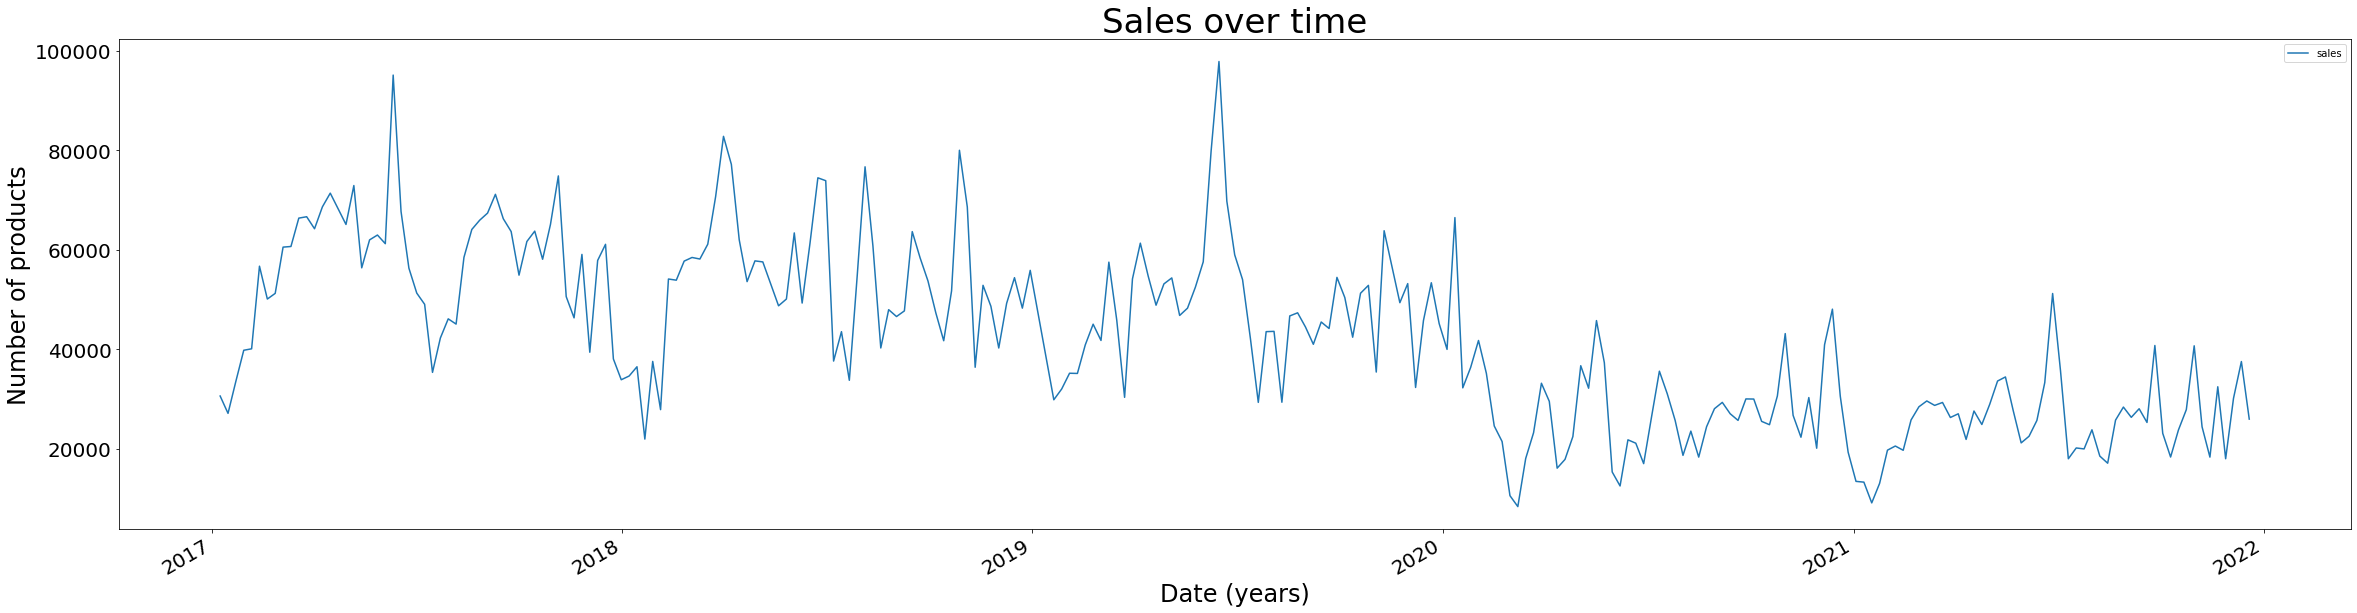

In [199]:
plt.figure()
ax1 = data[['Date','sales']].groupby('Date').sum().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales over time',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})

### Outliers
First of all we will remove the negative sales that are considered as returns. In this sense we will remove as well negative and zero prices, RRPs, costs.

There are as well some values that do not make sense as too higher prices or an specific product showing strange behaivours. Since this data is been collected by different teams we do not have the chance to correct this values.

In [200]:
data.drop(data[data['sales'] < 0].index, inplace=True)
# for now we drop those rows where the PRICE is negative
data.drop(data[data['Price'] < 0].index, inplace=True)
# for now we drop those rows where the RRP is negative
data.drop(data[data['RRP'] < 0].index, inplace=True)
data.drop(data[data['Cost'] < 0].index, inplace=True)
data.drop(data[(data['Cost'] == 0)&(data['Price'] == 0)&(data['RRP'] == 0)&(data['sales'] == 0)].index, inplace=True)

In [201]:
data.columns

Index(['Description', 'Seasonality', 'Year', 'Week', 'Channel',
       'WSSI Category', 'LIMITED EDITION STYLES', 'Originals', 'Source',
       'sales', 'gender', 'style', 'prev_sales', 'prev_sales2', 'prev_sales3',
       'prev_sales4', 'prev_mean_price', 'Date', 'Price', 'Discount', 'Margin',
       'RRP', 'Markdown', 'Cost'],
      dtype='object')

Text(0.5, 0, 'Date (years)')

<Figure size 432x288 with 0 Axes>

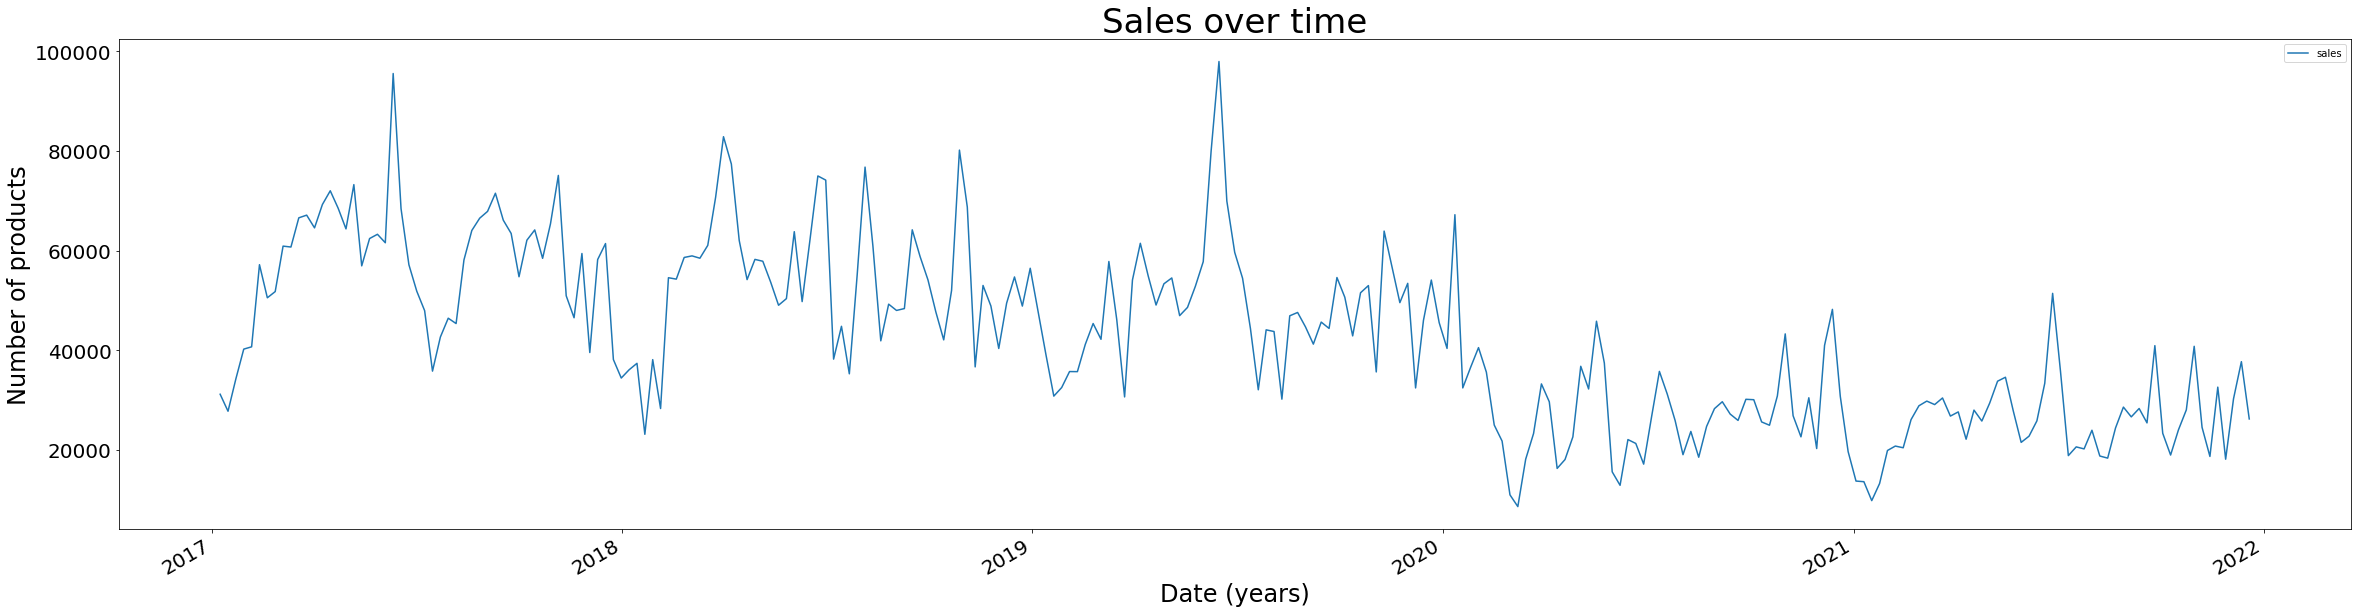

In [202]:
plt.figure()
ax1 = data[['Date','sales']].groupby('Date').sum().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales over time',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})

<AxesSubplot:>

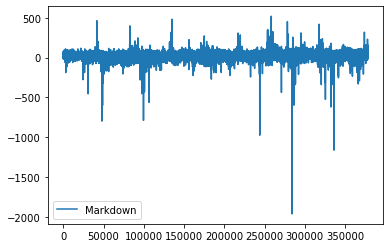

In [203]:
#We plot Markdown variable
data.plot(y='Markdown')

<AxesSubplot:>

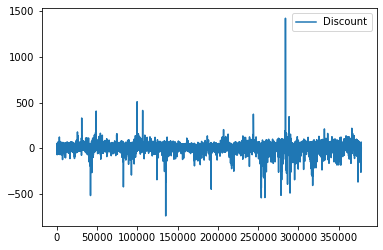

In [204]:
#We plot Discount variable
data.plot(y='Discount')

Some of the values we have belong to outliers that we want to remove:

In [205]:
data.drop(data[data['Price'] > 120].index, inplace=True)
#data.drop(data[data['Description'] == 'County'].index, inplace=True)
data.drop(data[data['Markdown']<-400].index, inplace=True)
data.drop(data[(data['Discount']<-400)&(data['Discount']<400)].index, inplace=True)

## Data Analysis
After all the cleaning let's take a look on the measures of all our numeric variables

In [206]:
data[['sales','Price', 'Discount', 'RRP', 'Markdown','Cost']].describe()

sales          Price       Discount            RRP  \
count  324429.000000  324215.000000  324215.000000  324215.000000   
mean       34.008304      32.398850       4.948032      56.054825   
std       107.453491      18.832828      11.412965      23.610682   
min         0.000000       0.000000    -367.718970       0.000000   
25%         2.000000      20.010000       0.000000      49.166666   
50%         5.000000      31.031799       0.372143      57.500000   
75%        24.000000      44.410748       6.943333      68.964580   
max      9281.000000     119.979608     345.490000     166.430318   

            Markdown           Cost  
count  324215.000000  324215.000000  
mean       18.707943      14.849791  
std        20.140831       7.268713  
min      -328.343333       0.000000  
25%         0.002792      13.018398  
50%        19.153333      15.460000  
75%        33.330000      18.150000  
max       405.560641    1619.860000

In [207]:
data['WSSI Category'].value_counts()

Womens Casual Shoes          69062
Womens Casual Sandals        24063
Womens Casual Boots          22541
Womens Formal Shoes          20429
Womens Active Shoes          19382
Acc Handbags and Purses      17795
Womens Smart Casual Shoes    17710
Shoe Care                    17668
Womens Formal Sandals        14799
Mens Casual Shoes            14638
Womens Deck Shoes            14030
Other Accessories            13177
Mens Formal Shoes            12095
Womens Slippers              11510
Womens Goretex               11377
Womens Formal Boots           9523
Mens Goretex                  5420
Mens Slippers                 4241
Free Gift                     1940
Mens Sandals                  1326
 NO CATEGORY                   932
Mens Boots                     771
Name: WSSI Category, dtype: int64

<AxesSubplot:>

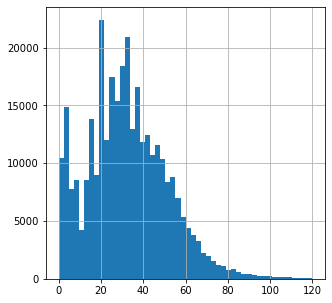

In [1334]:
data['Price'].hist(figsize=(5,5),bins=50)

<AxesSubplot:>

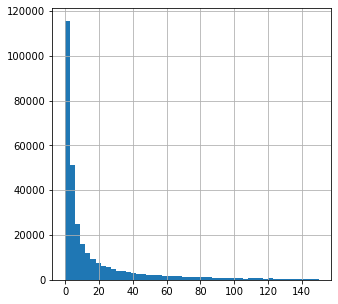

In [1335]:
data['sales'].hist(figsize=(5,5),range=(0,150),bins=50)

<AxesSubplot:>

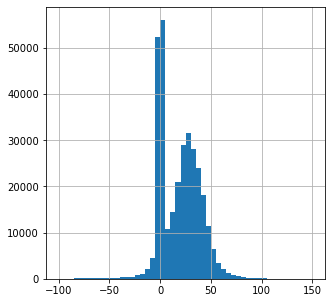

In [1336]:
data['Markdown'].hist(figsize=(5,5),range=(-100,150),bins=50)

<AxesSubplot:>

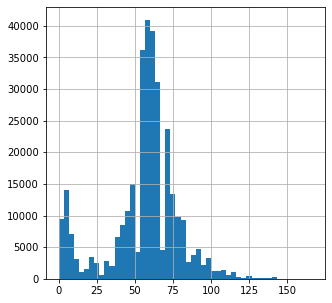

In [1337]:
data['RRP'].hist(figsize=(5,5),bins=50)

<AxesSubplot:>

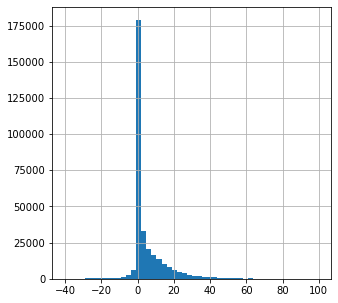

In [1338]:
data['Discount'].hist(range=(-40,100), figsize=(5,5),bins=50)

<AxesSubplot:>

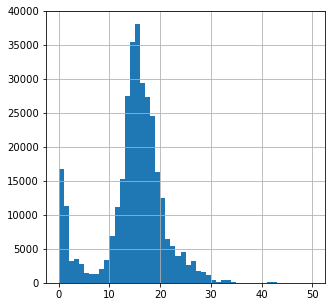

In [1339]:
data['Cost'].hist(range=(0,50), figsize=(5,5),bins=50)

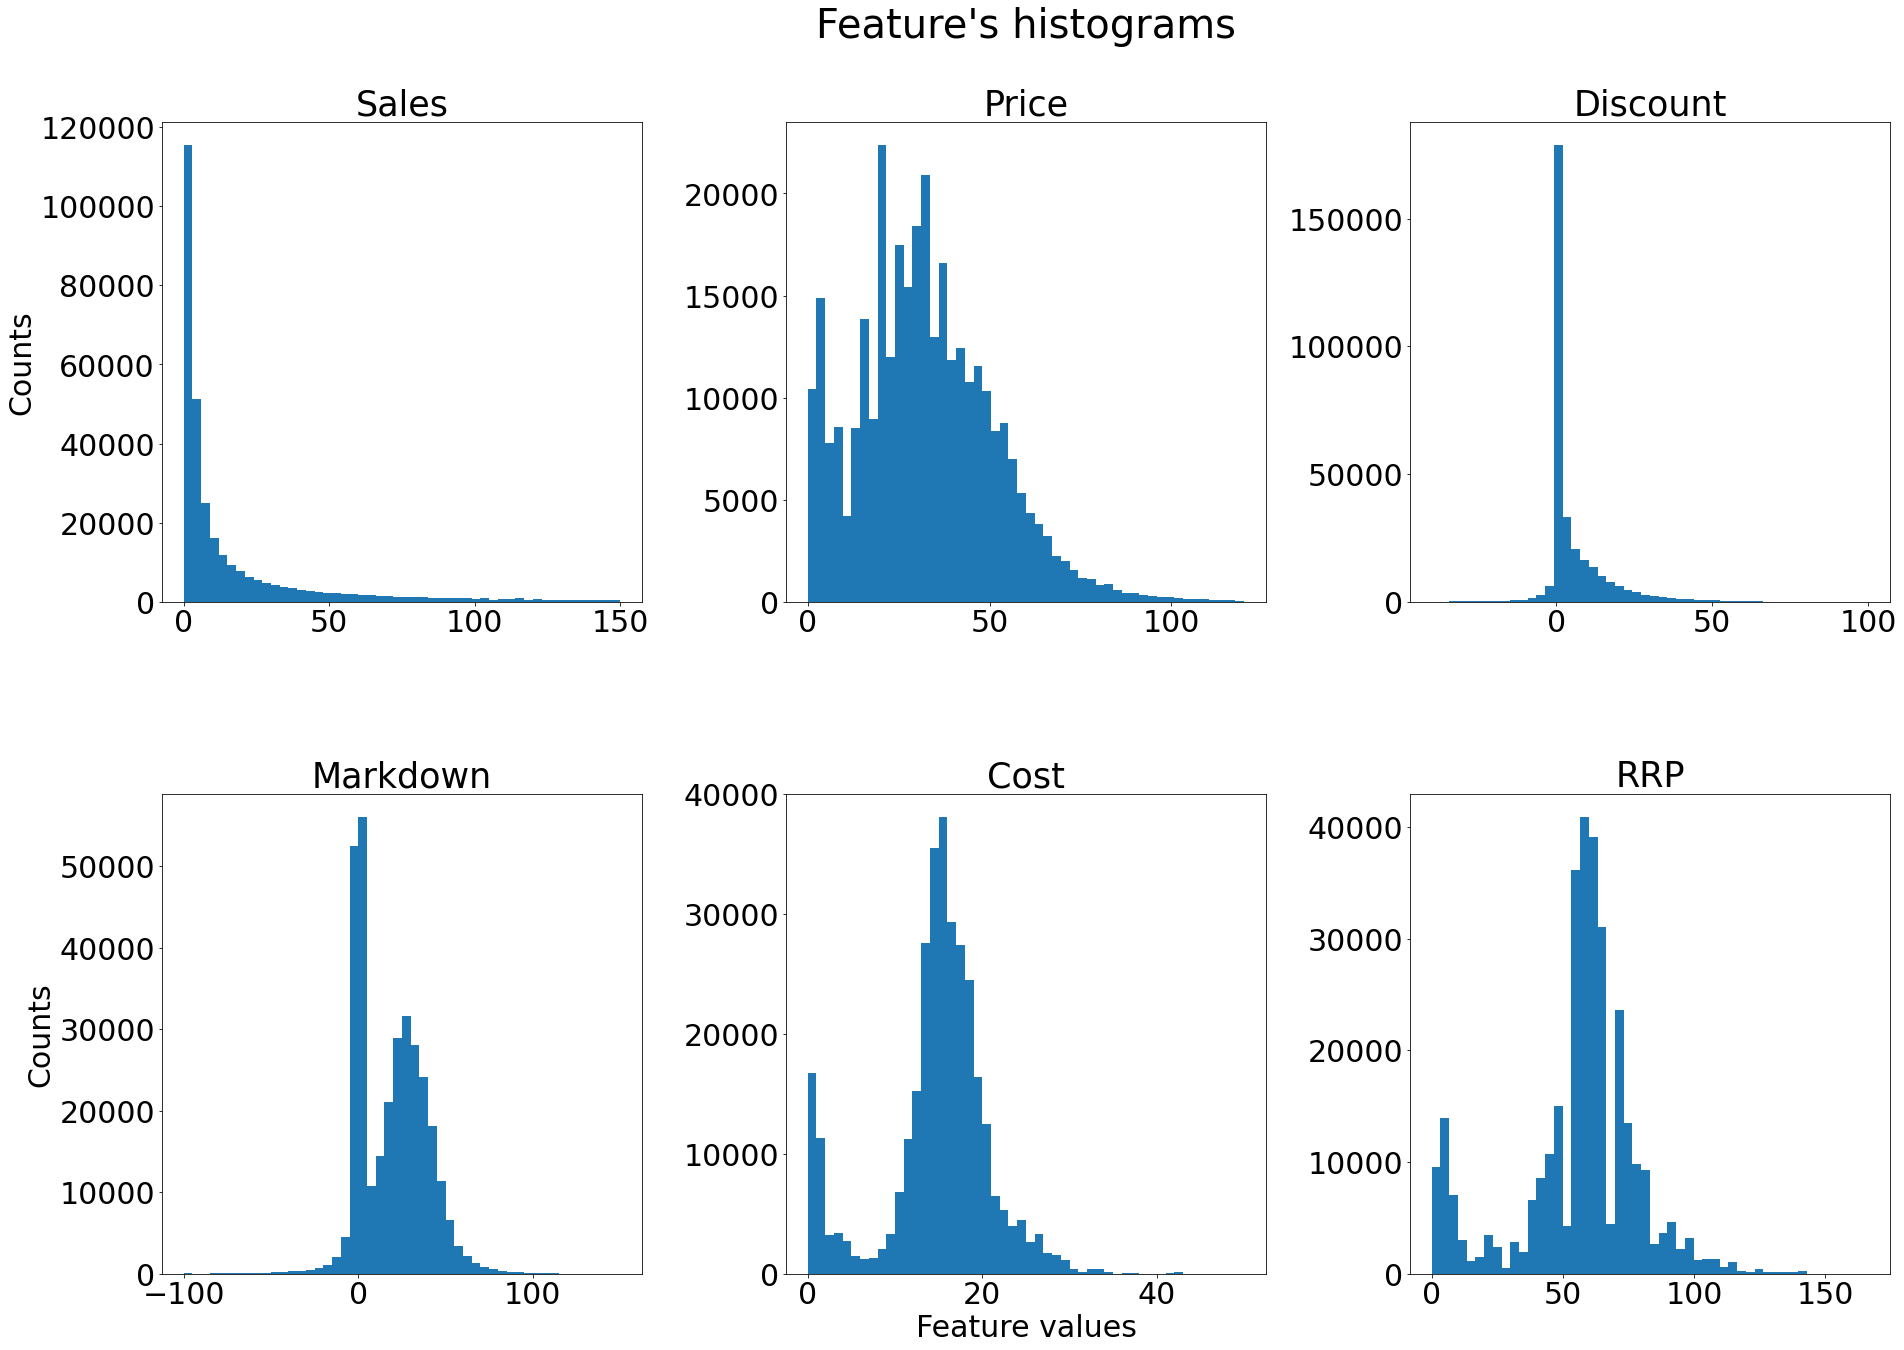

In [28]:
#Everything plotted in the same figure
fig, axs = plt.subplots(2, 3,figsize=(30,20))
fig.size = (100,100)
fig.suptitle("Feature's histograms", fontsize=40)

axs[0, 0].hist(data['sales'],range=(0,150),bins=50)
axs[0, 0].set_title('Sales', fontsize=35)
axs[0, 0].set_ylabel('Counts',fontsize=30)
axs[0, 0].tick_params(axis='both', labelsize=30)

axs[0, 1].hist(data['Price'],bins=50)
axs[0, 1].set_title('Price', fontsize=35)
axs[0, 1].tick_params(axis='both', labelsize=30)

axs[0, 2].hist(data['Discount'],range=(-40,100),bins=50)
axs[0, 2].set_title('Discount',fontsize=35)
axs[0, 2].tick_params(axis='both', labelsize=30)

axs[1, 0].hist(data['Markdown'],range=(-100,150),bins=50)
axs[1, 0].set_title('Markdown', fontsize=35)
axs[1, 0].set_ylabel('Counts', fontsize=30)
axs[1, 0].tick_params(axis='both', labelsize=30)

axs[1, 1].hist(data['Cost'],range=(0,50),bins=50)
axs[1, 1].set_title('Cost', fontsize=35)
axs[1, 1].set_xlabel('Feature values', fontsize=30)
axs[1, 1].tick_params(axis='both', labelsize=30)

axs[1, 2].hist(data['RRP'],bins=50)
axs[1, 2].set_title('RRP', fontsize=35)
axs[1, 2].tick_params(axis='both', labelsize=30)

#for ax in axs.flat:
 #   ax.set(xlabel='Feature values', ylabel='Counts')
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.savefig('../Images/hist.png')

We are also interested in viewing if exists any correlation between variables

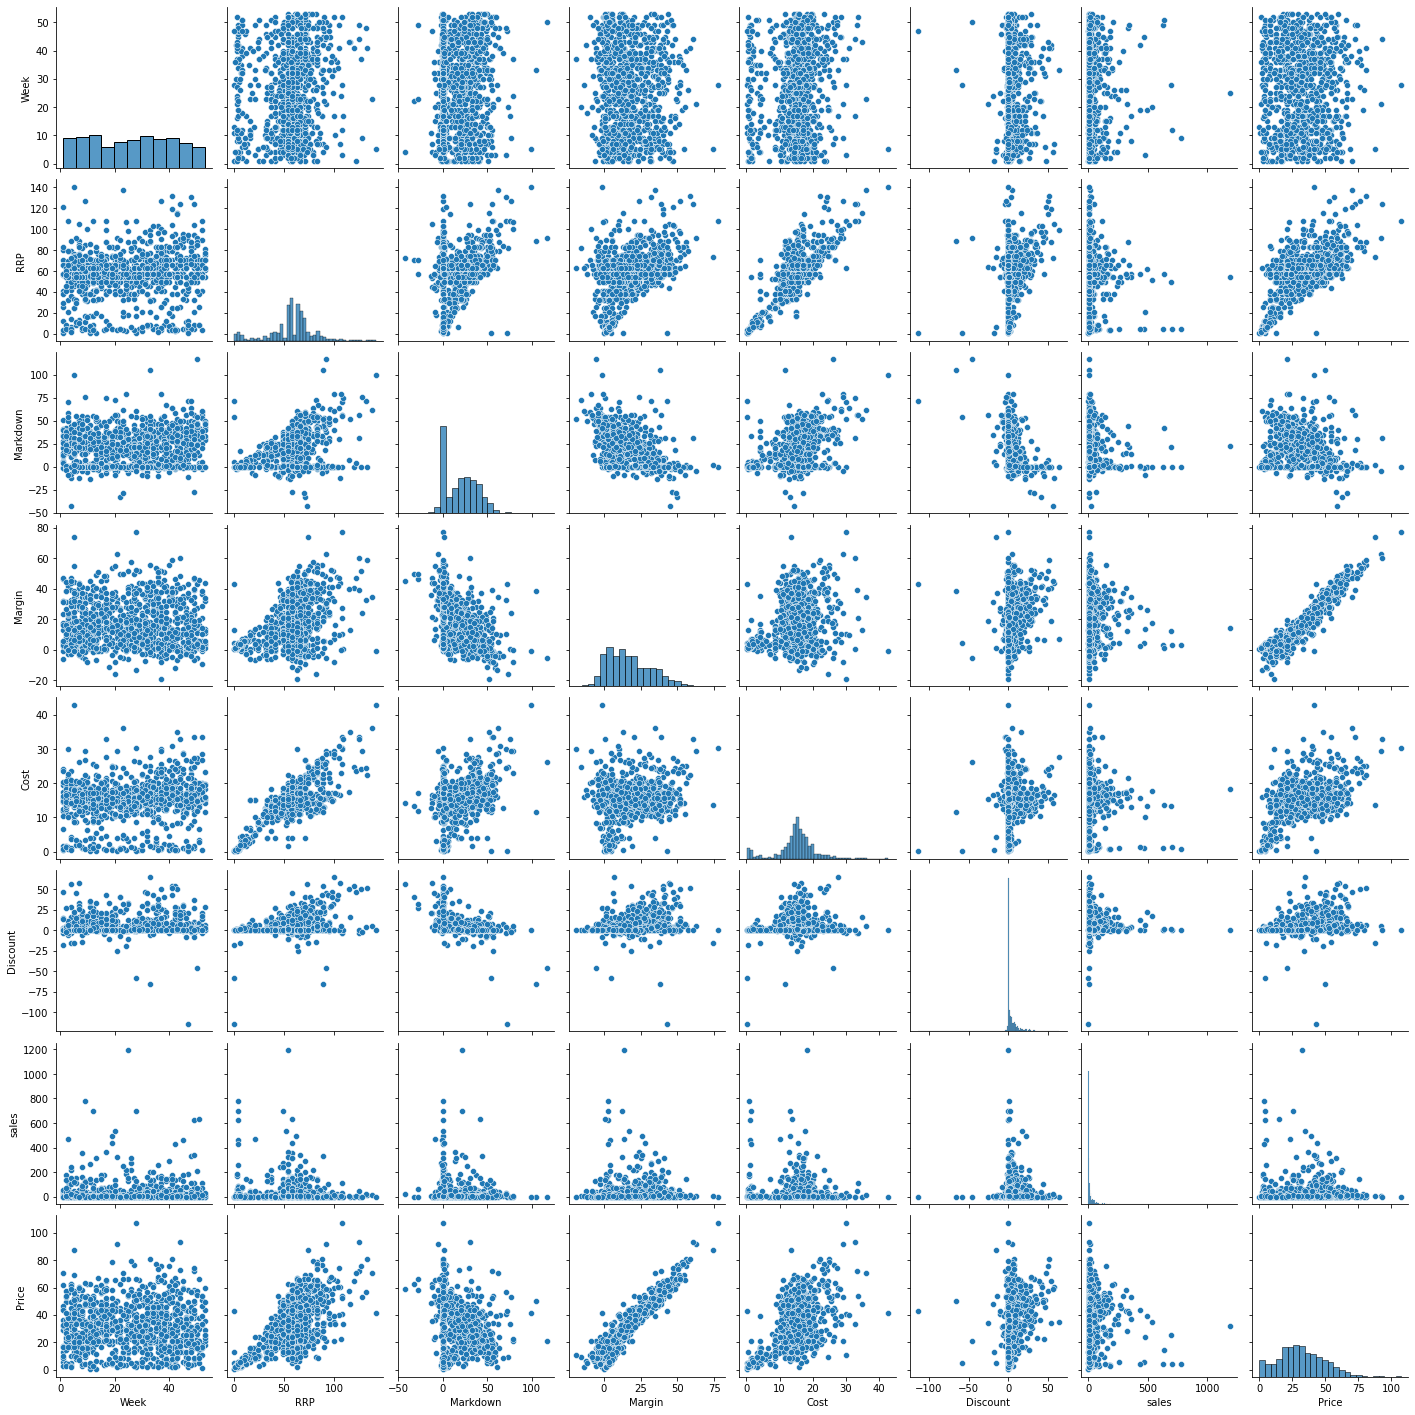

In [101]:
sns.pairplot(data.loc[:,[
                         'Week','RRP','Markdown',
                         'Margin','Cost',
                         'Discount','sales','Price']].sample(n=1000))

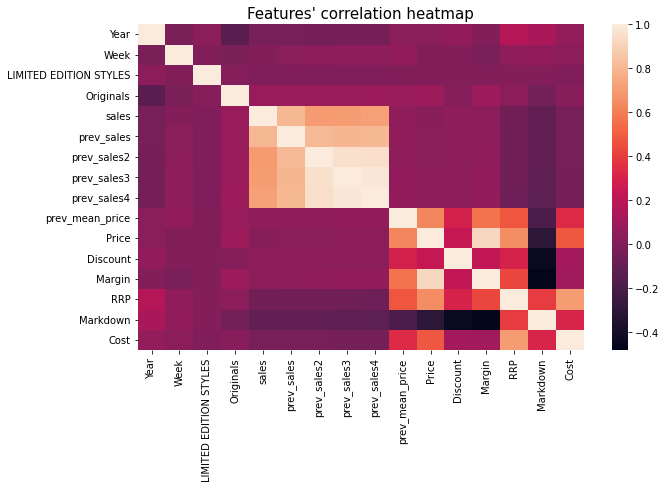

In [1342]:
plt.figure(figsize = (10,6))
plt.title("Features' correlation heatmap", fontsize=15)
sns.heatmap(data.corr(), annot=False, annot_kws={"fontsize":25})
plt.savefig('../Images/heatmap.png')

# Data Visualization
## Sales and Price Over Time
We now take a look to the overall demand and demand by category thourugh the years.


Text(0.5, 0, 'Date (years)')

<Figure size 432x288 with 0 Axes>

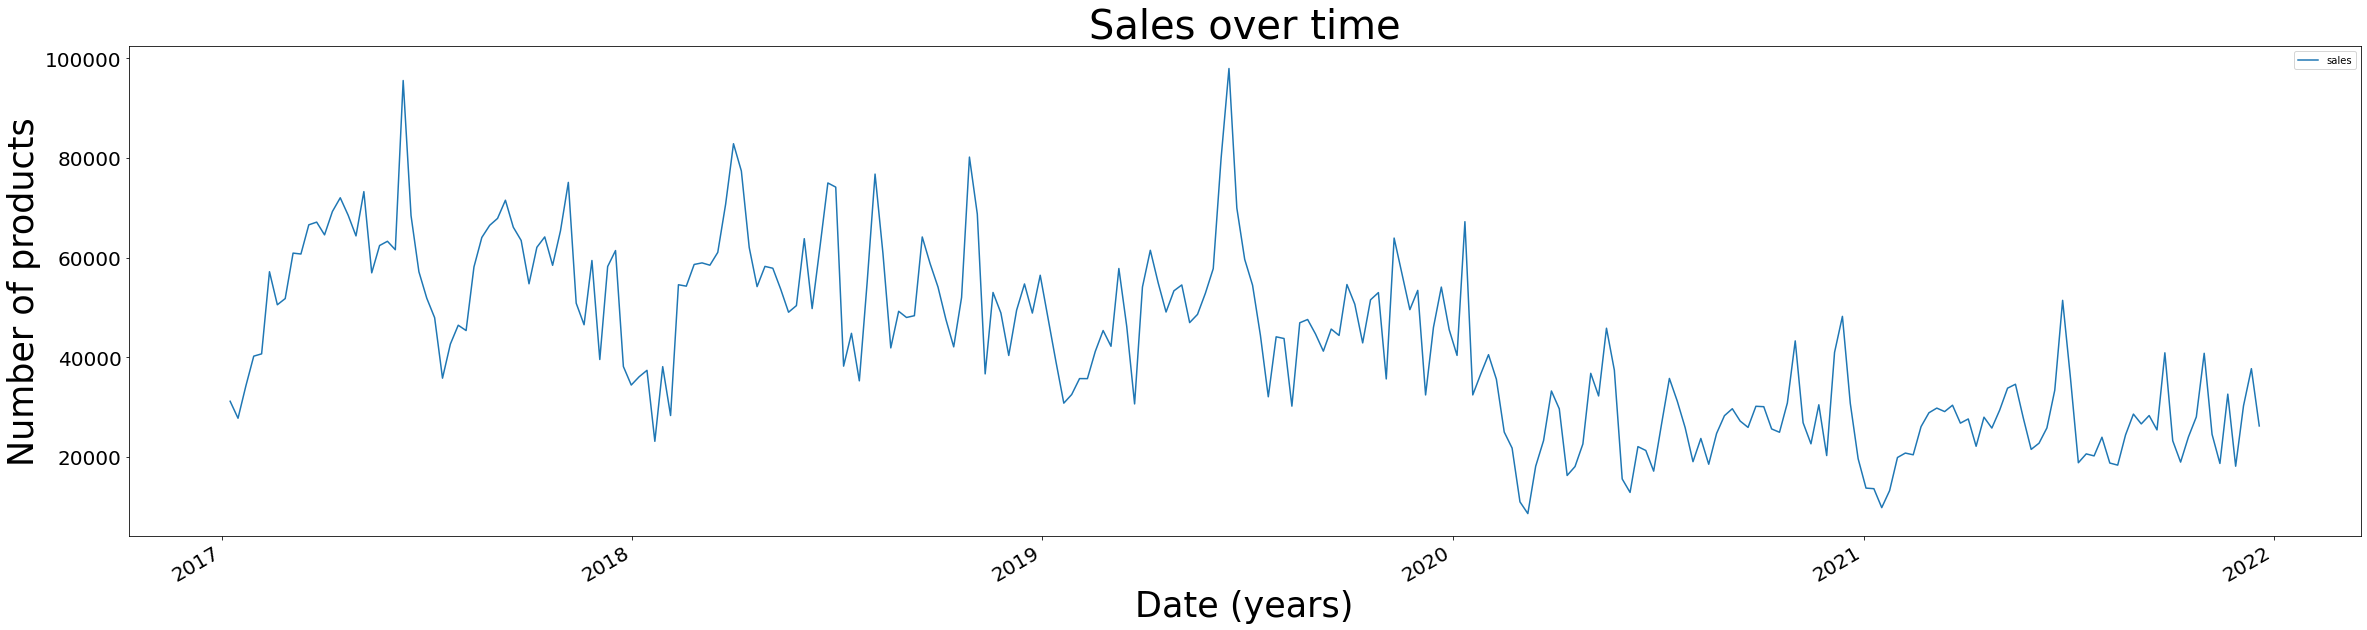

In [161]:
plt.figure()
ax1 = data[['Date','sales']].groupby('Date').sum().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales over time',fontdict={'fontsize':40})
ax1.set_ylabel('Number of products',fontdict={'fontsize':35})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':35})

<Figure size 432x288 with 0 Axes>

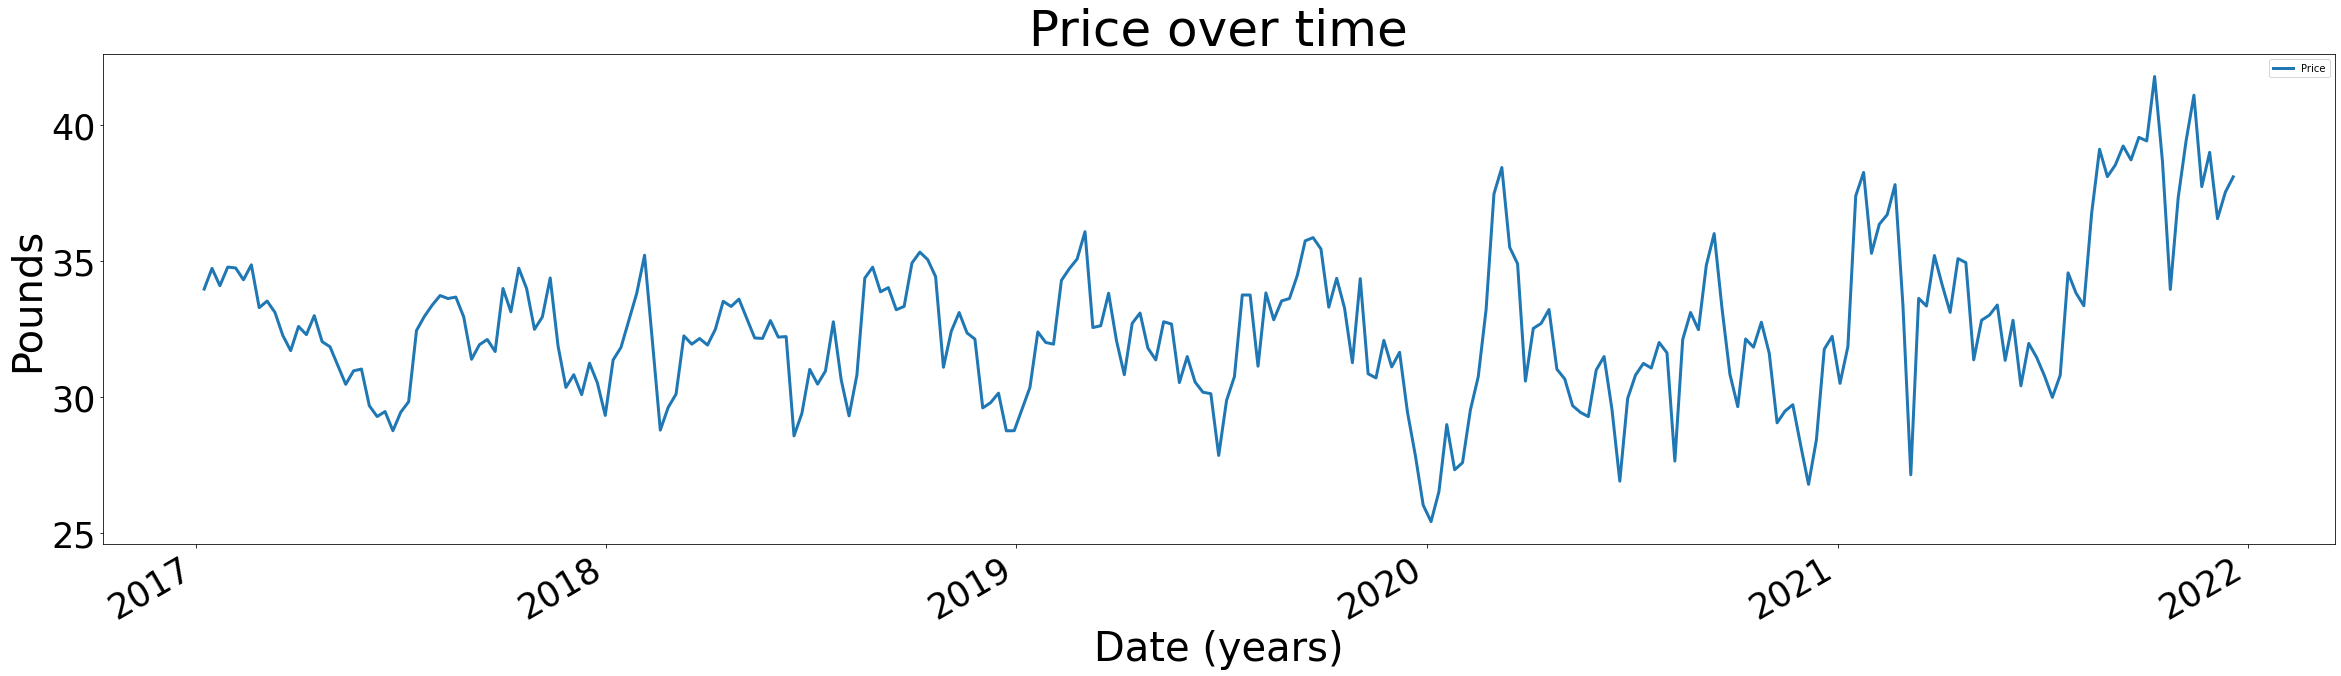

In [164]:
plt.figure()
ax1 = data[['Date','Price']].groupby('Date').mean().plot(figsize=(40,10), ylabel='Price', linewidth=3, title='Price over time', fontsize=20)
ax1.set_title('Price over time',fontdict={'fontsize':50})
ax1.set_ylabel('Pounds',fontdict={'fontsize':40})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':40})
ax1.tick_params(axis='both',labelsize=35)

plt.savefig('../Images/priceovertime.png')

We now plot some of the categories

<Figure size 432x288 with 0 Axes>

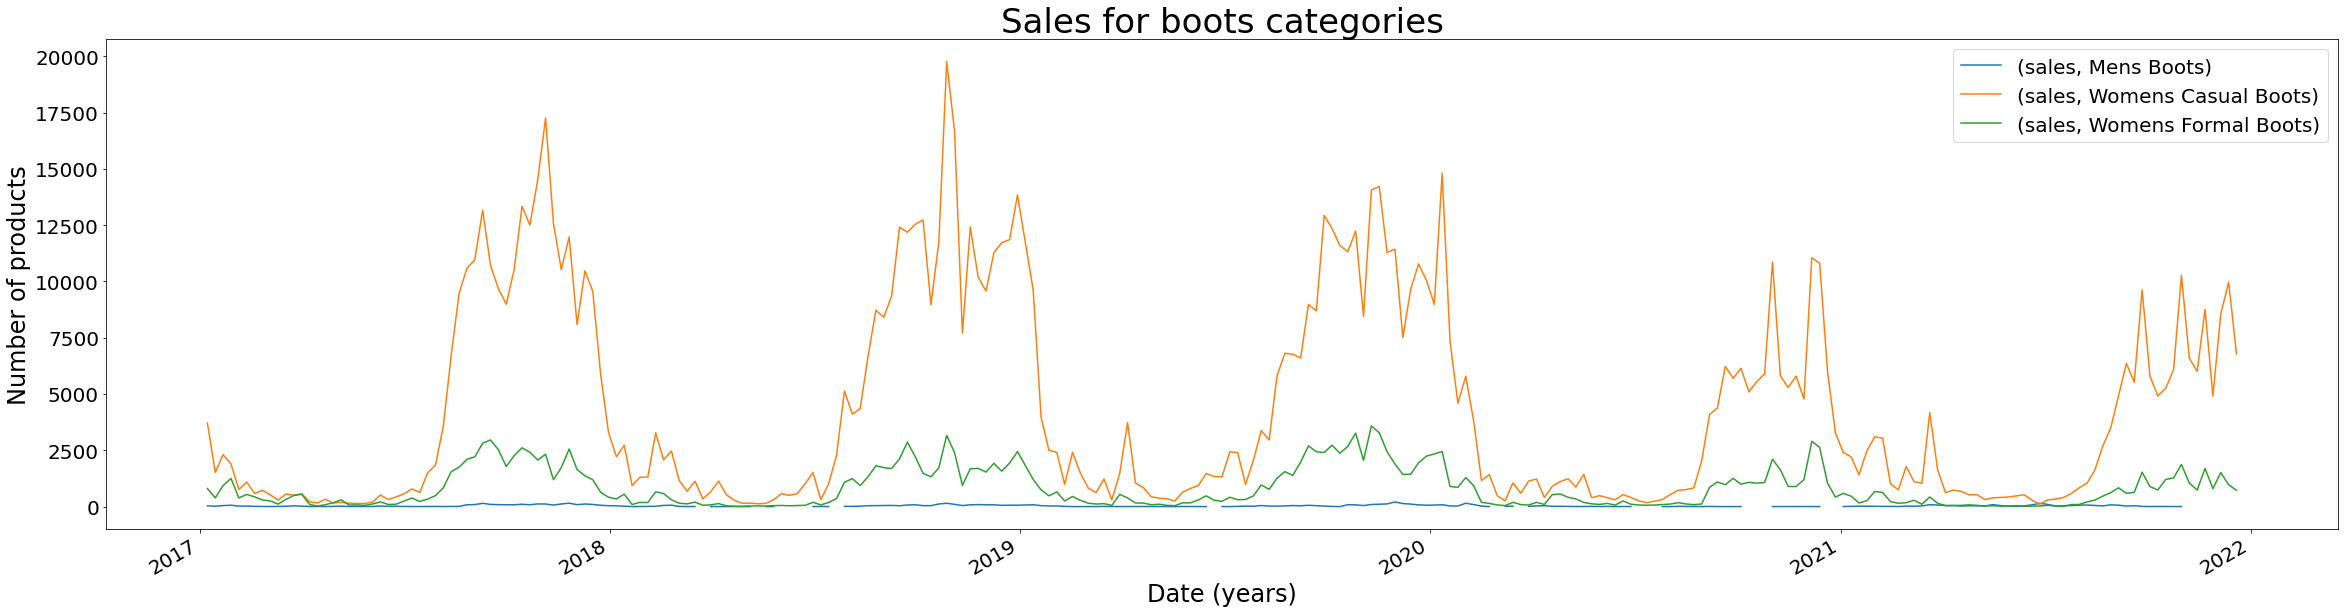

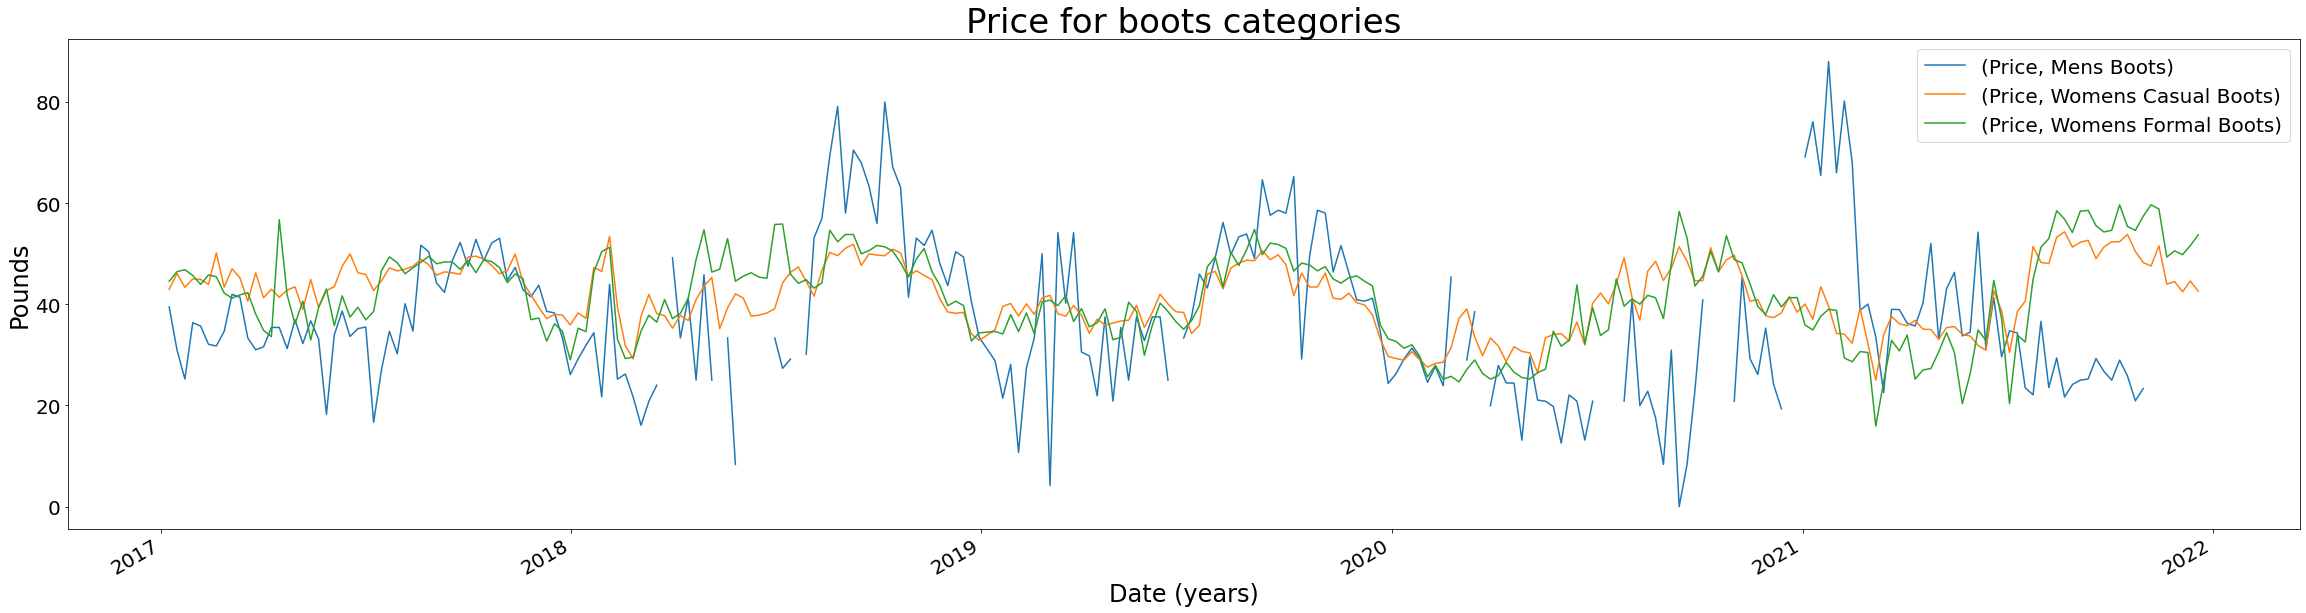

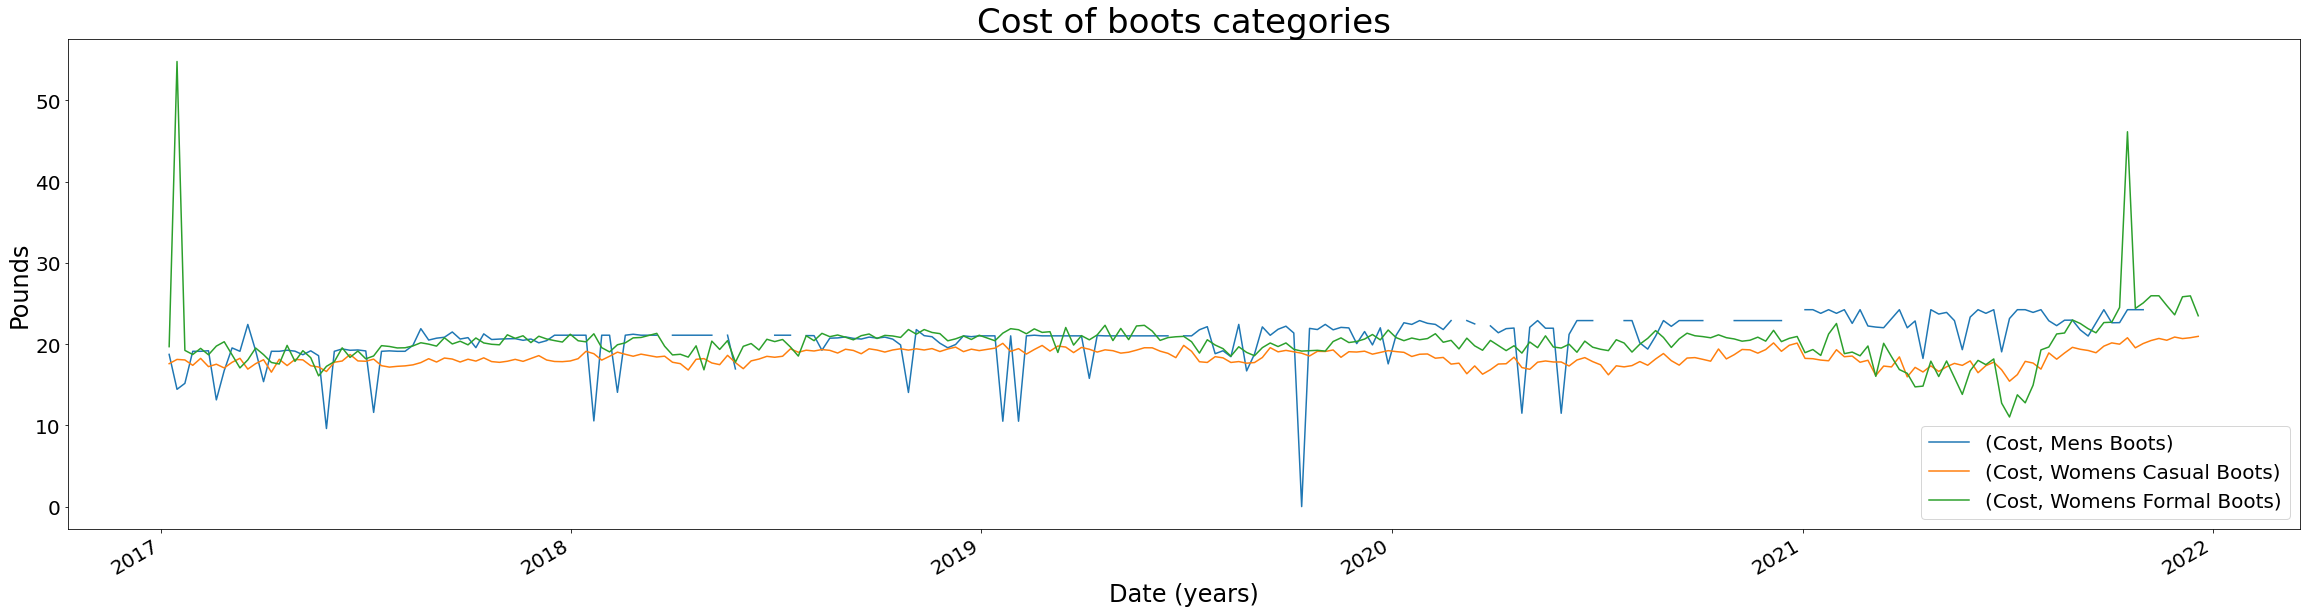

In [1346]:
plt.figure()
ax1 = data[data['WSSI Category'].str.contains('Boots')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for boots categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

ax2 = data[data['WSSI Category'].str.contains('Boots')][['Date','Price','WSSI Category']].groupby(['Date','WSSI Category']).mean().unstack().plot(figsize=(40,10), fontsize=20)
ax2.set_title('Price for boots categories',fontdict={'fontsize':34})
ax2.set_ylabel('Pounds',fontdict={'fontsize':24})
ax2.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax2.legend(fontsize=20)

ax3 = data[data['WSSI Category'].str.contains('Boots')][['Date','Cost','WSSI Category']].groupby(['Date','WSSI Category']).mean().unstack().plot(figsize=(40,10), fontsize=20)
ax3.set_title('Cost of boots categories',fontdict={'fontsize':34})
ax3.set_ylabel('Pounds',fontdict={'fontsize':24})
ax3.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax3.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

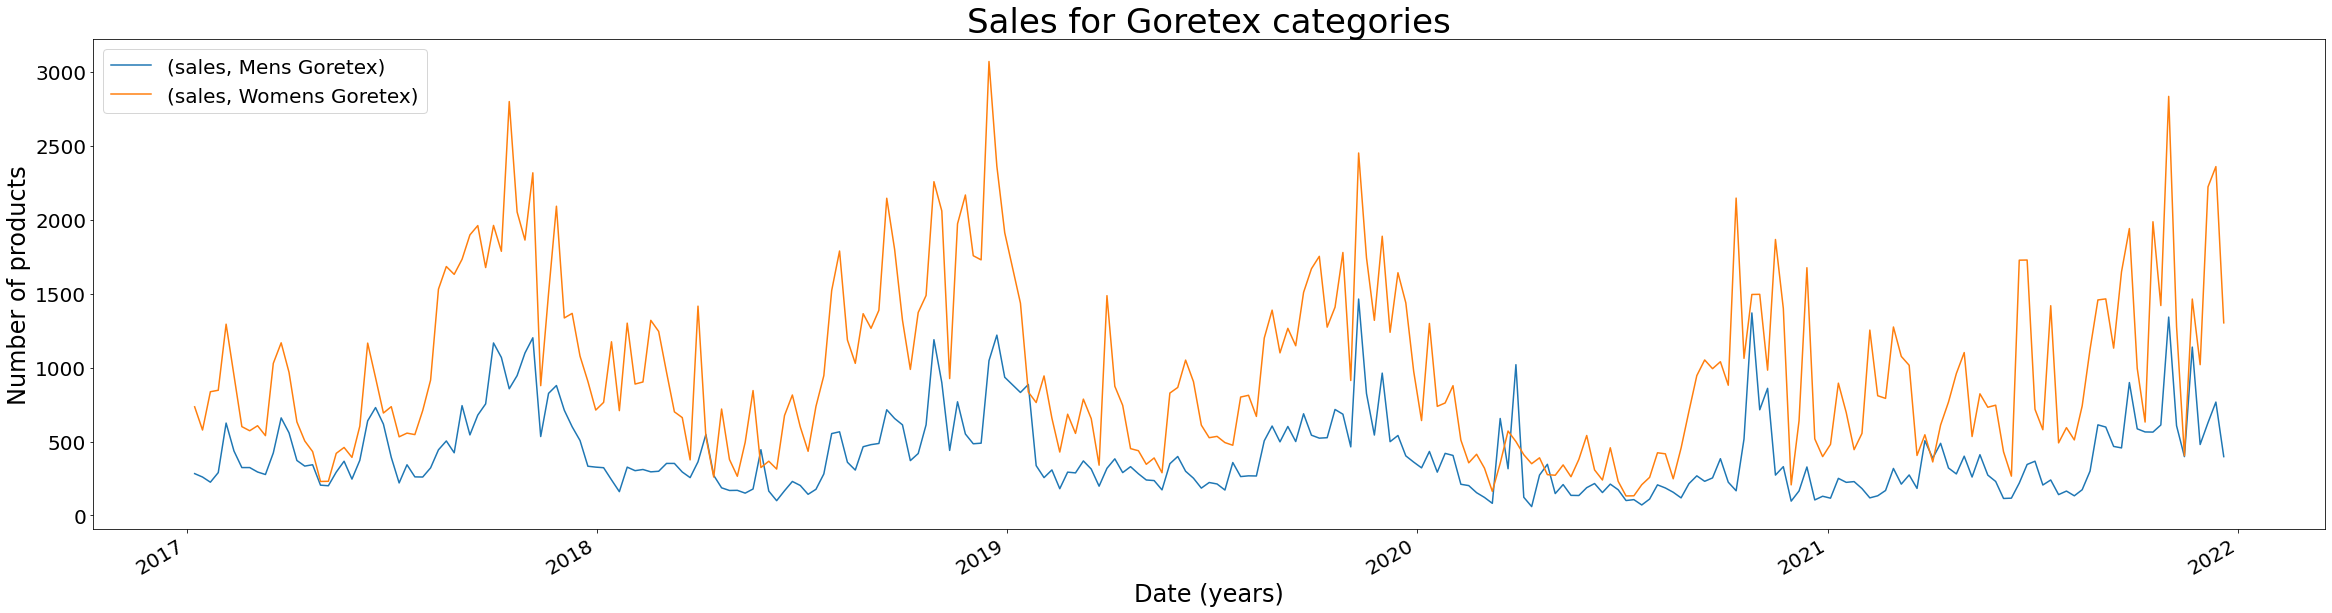

In [1347]:
plt.figure()
ax1 = data[data['WSSI Category'].str.contains('Goretex')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Goretex categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

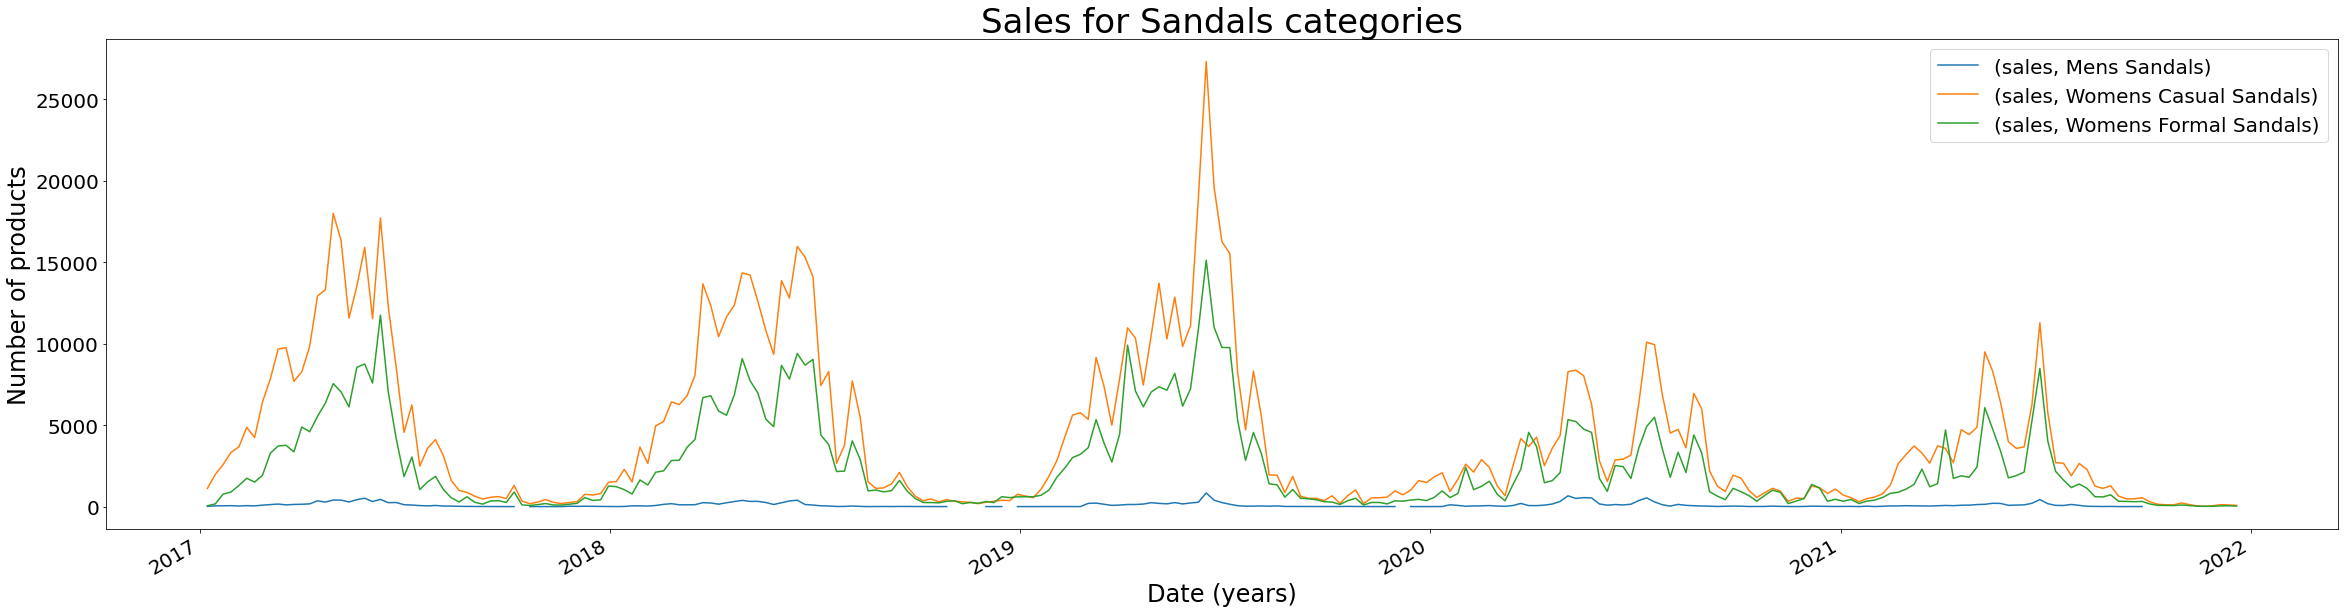

In [1348]:
plt.figure()
ax1 = data[data['WSSI Category'].str.contains('Sandals')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Sandals categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

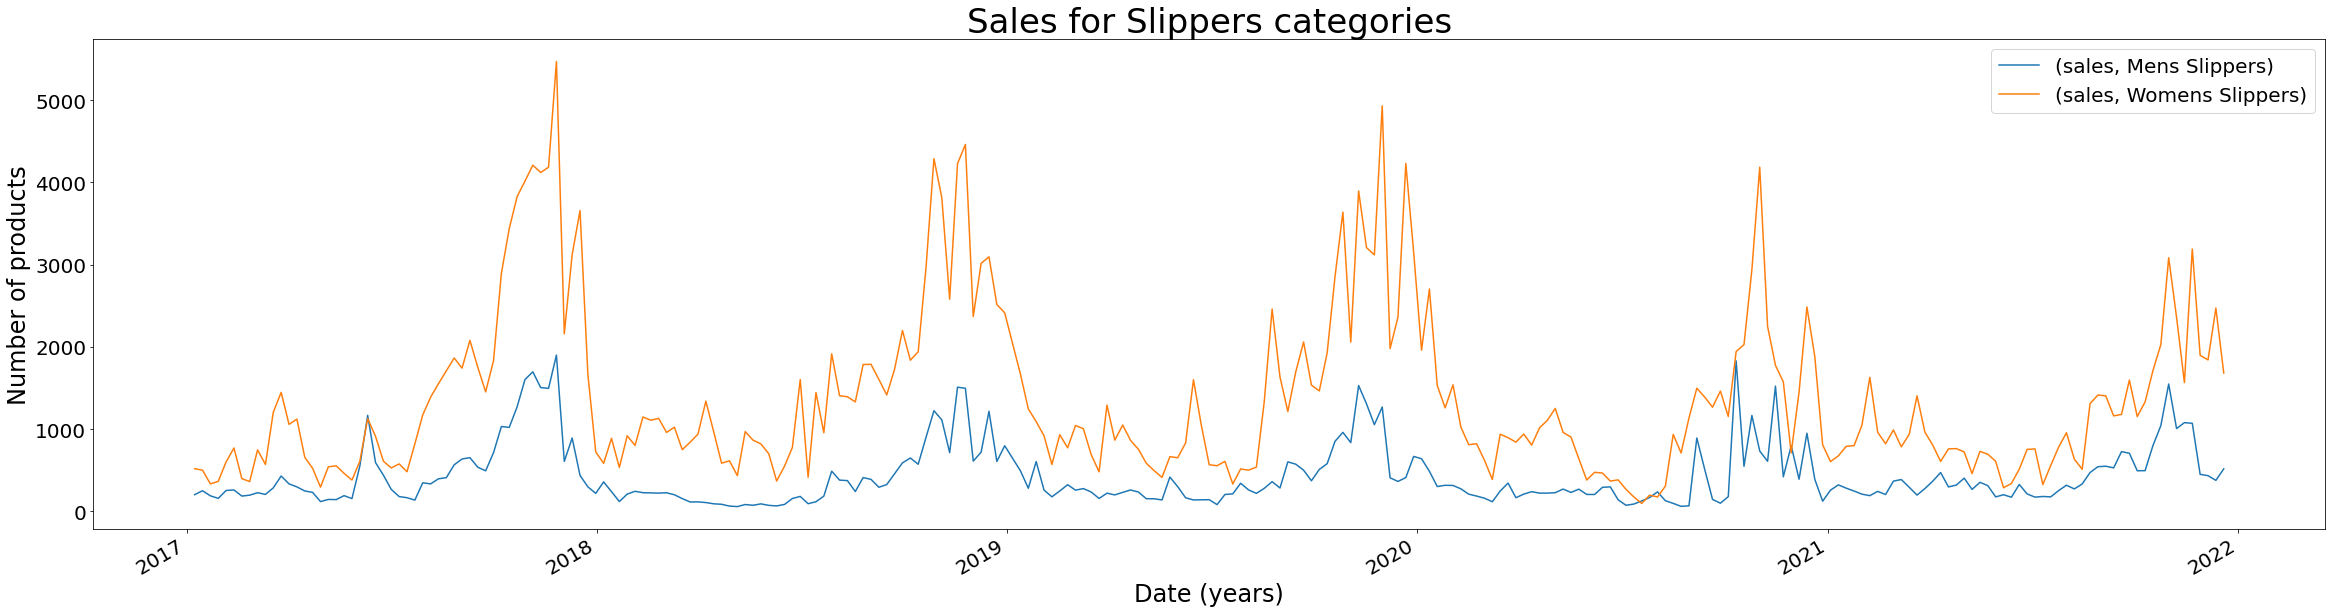

In [1349]:
plt.figure()
ax1 = data[data['WSSI Category'].str.contains('Slippers')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Slippers categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

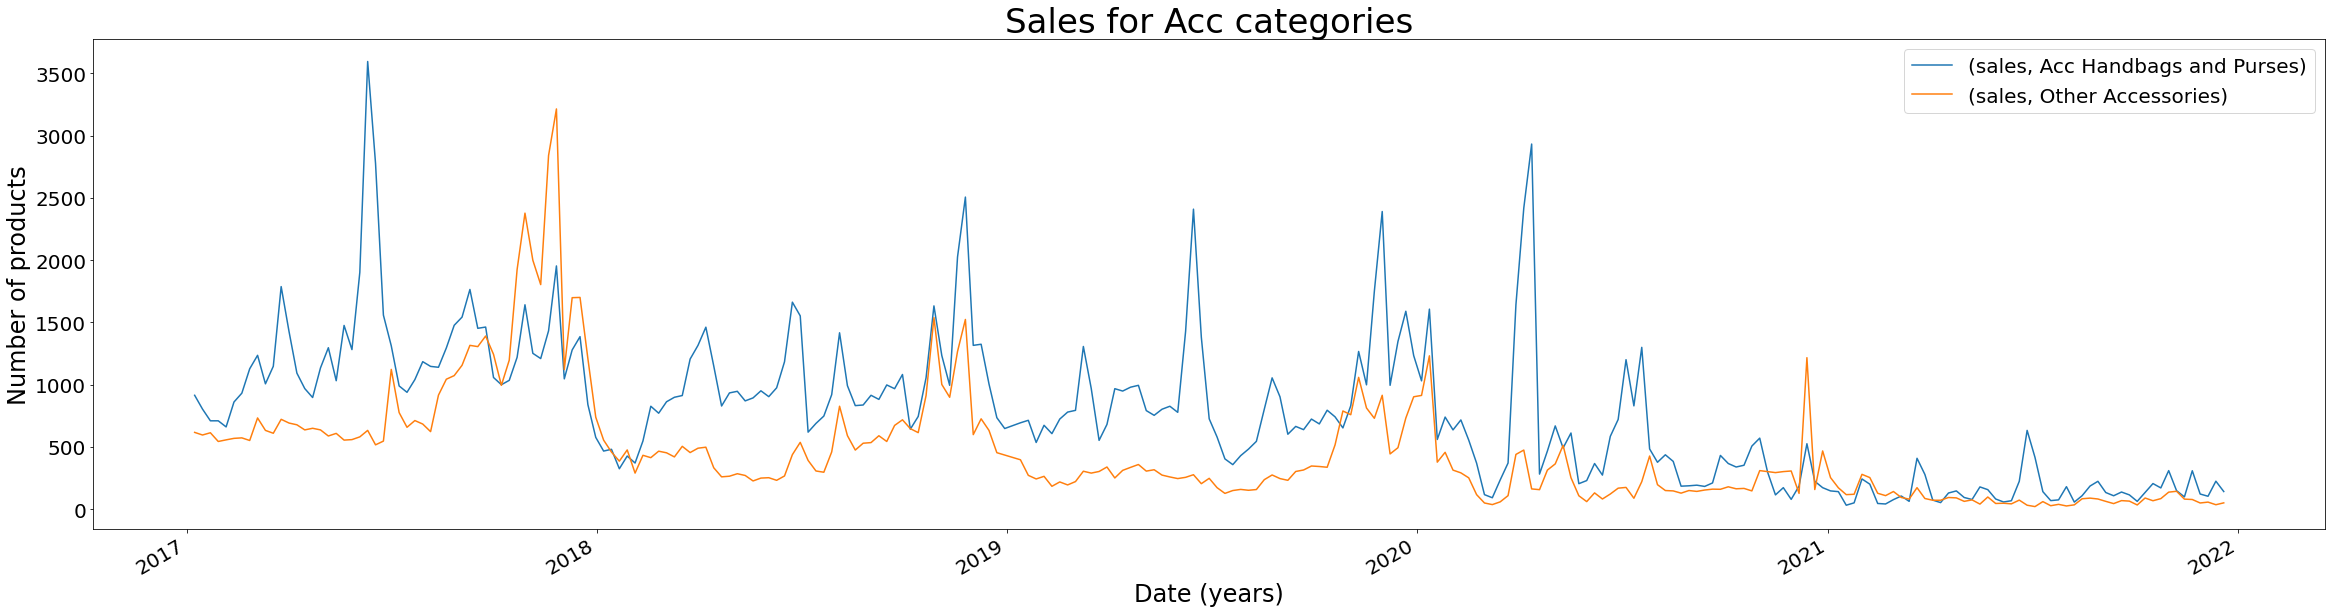

In [1350]:
plt.figure()
ax1 = data[data['WSSI Category'].str.contains('Acc')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Acc categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

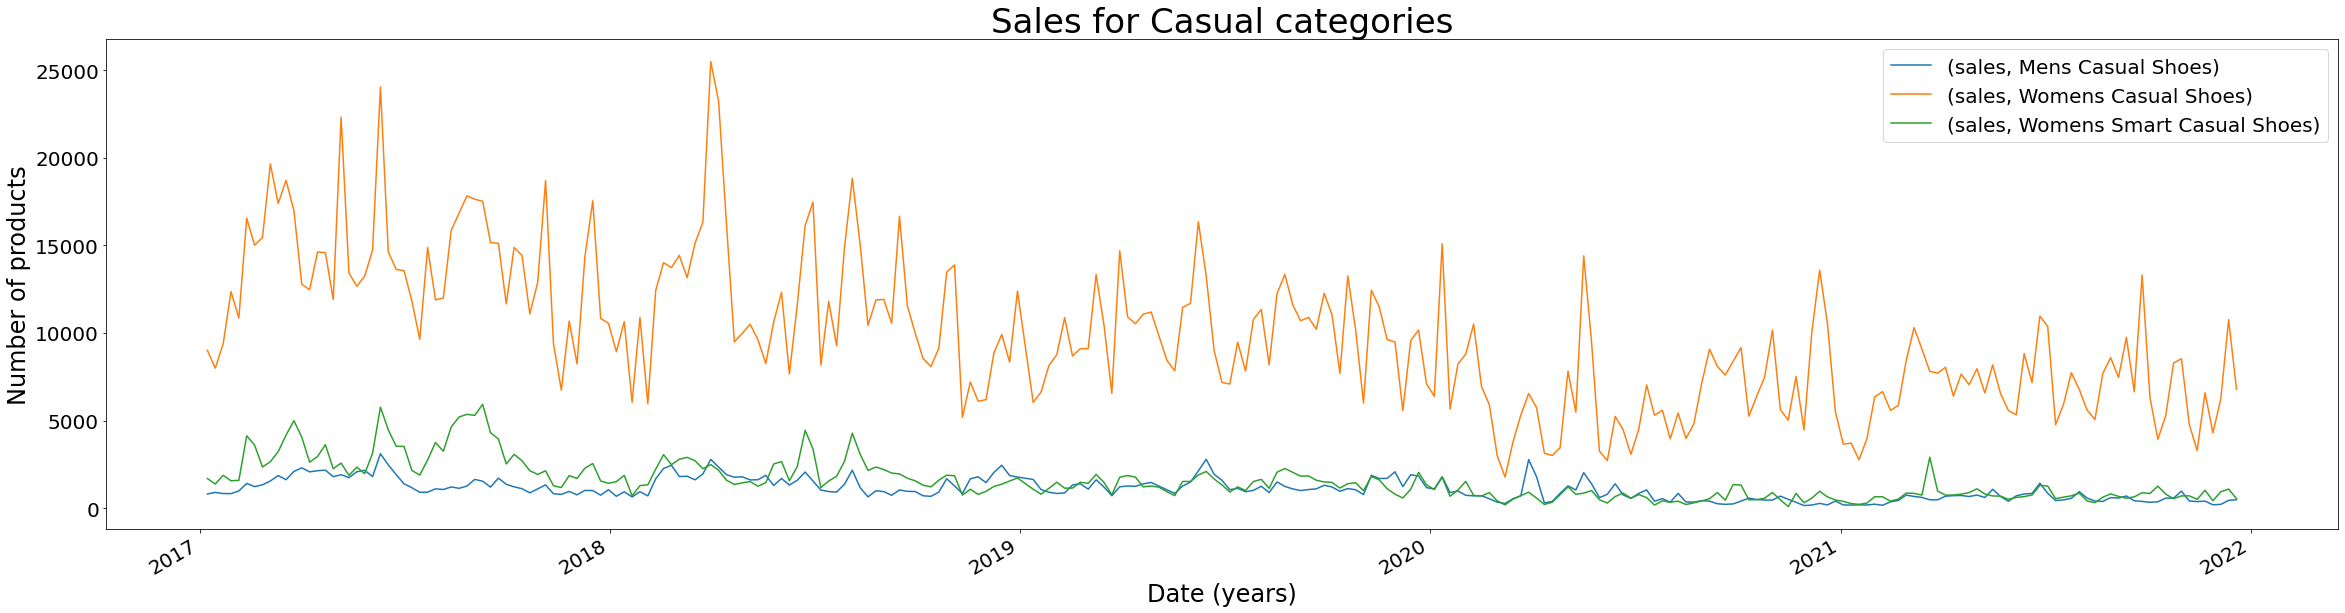

In [1351]:
plt.figure()
ax1 = data[(data['WSSI Category'].str.contains('Casual'))&(~data['WSSI Category'].str.contains('Acc'))&(~data['WSSI Category'].str.contains('Sandals'))&(~data['WSSI Category'].str.contains('Boots'))&(~data['WSSI Category'].str.contains('Goretex'))&(~data['WSSI Category'].str.contains('Slippers'))][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Casual categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

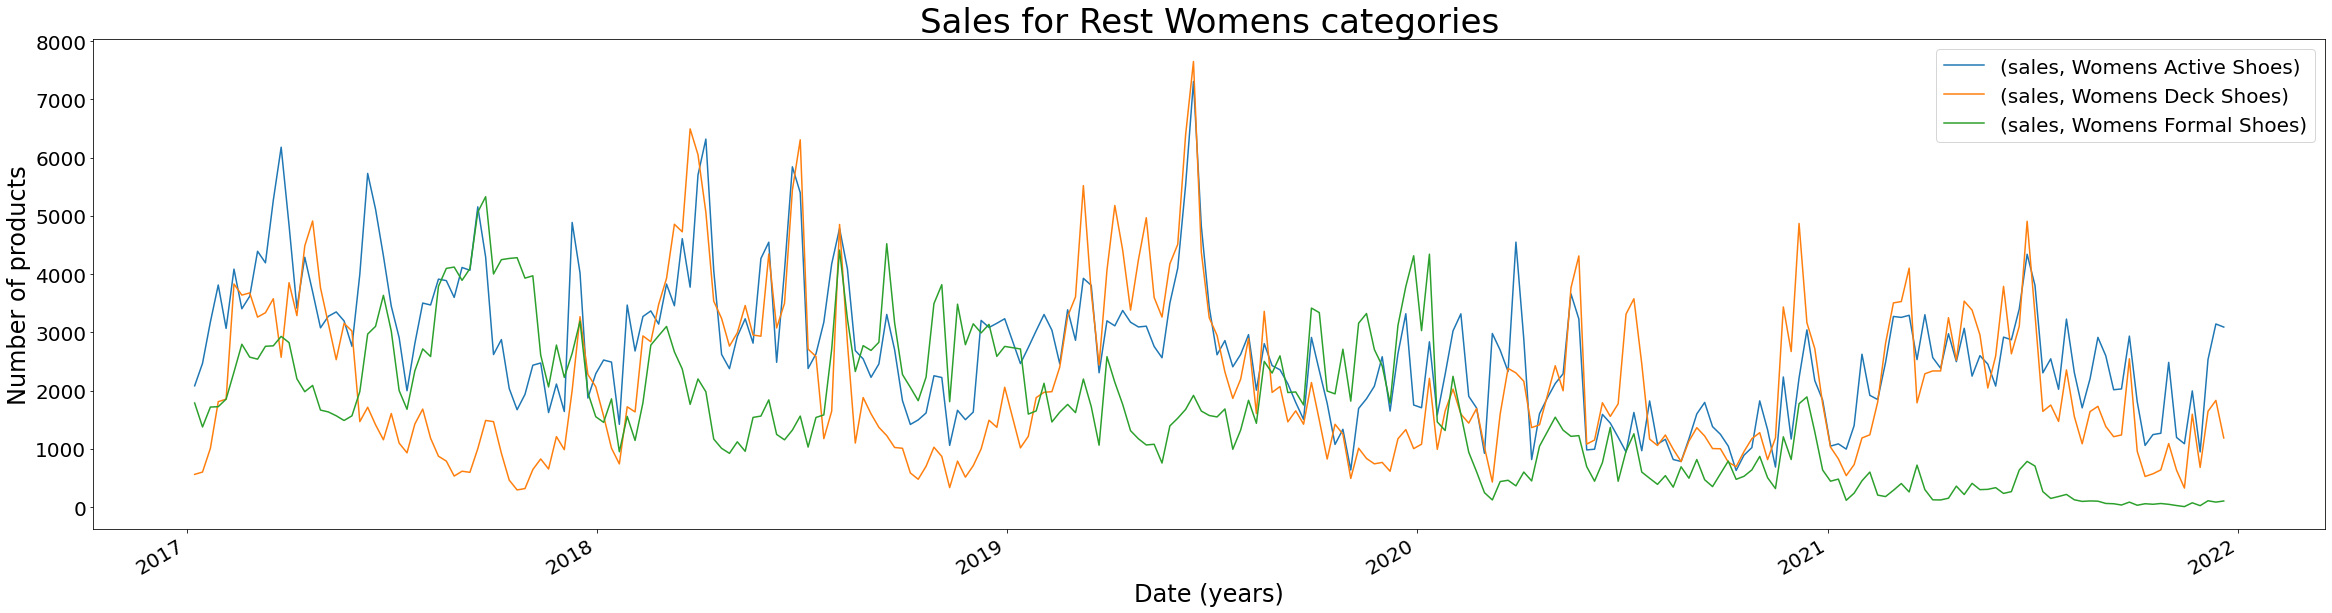

In [1352]:
plt.figure()
ax1 = data[(data['WSSI Category'].str.contains('Womens'))&(~data['WSSI Category'].str.contains('Casual'))&(~data['WSSI Category'].str.contains('Acc'))&(~data['WSSI Category'].str.contains('Sandals'))&(~data['WSSI Category'].str.contains('Boots'))&(~data['WSSI Category'].str.contains('Goretex'))&(~data['WSSI Category'].str.contains('Slippers'))][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Rest Womens categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

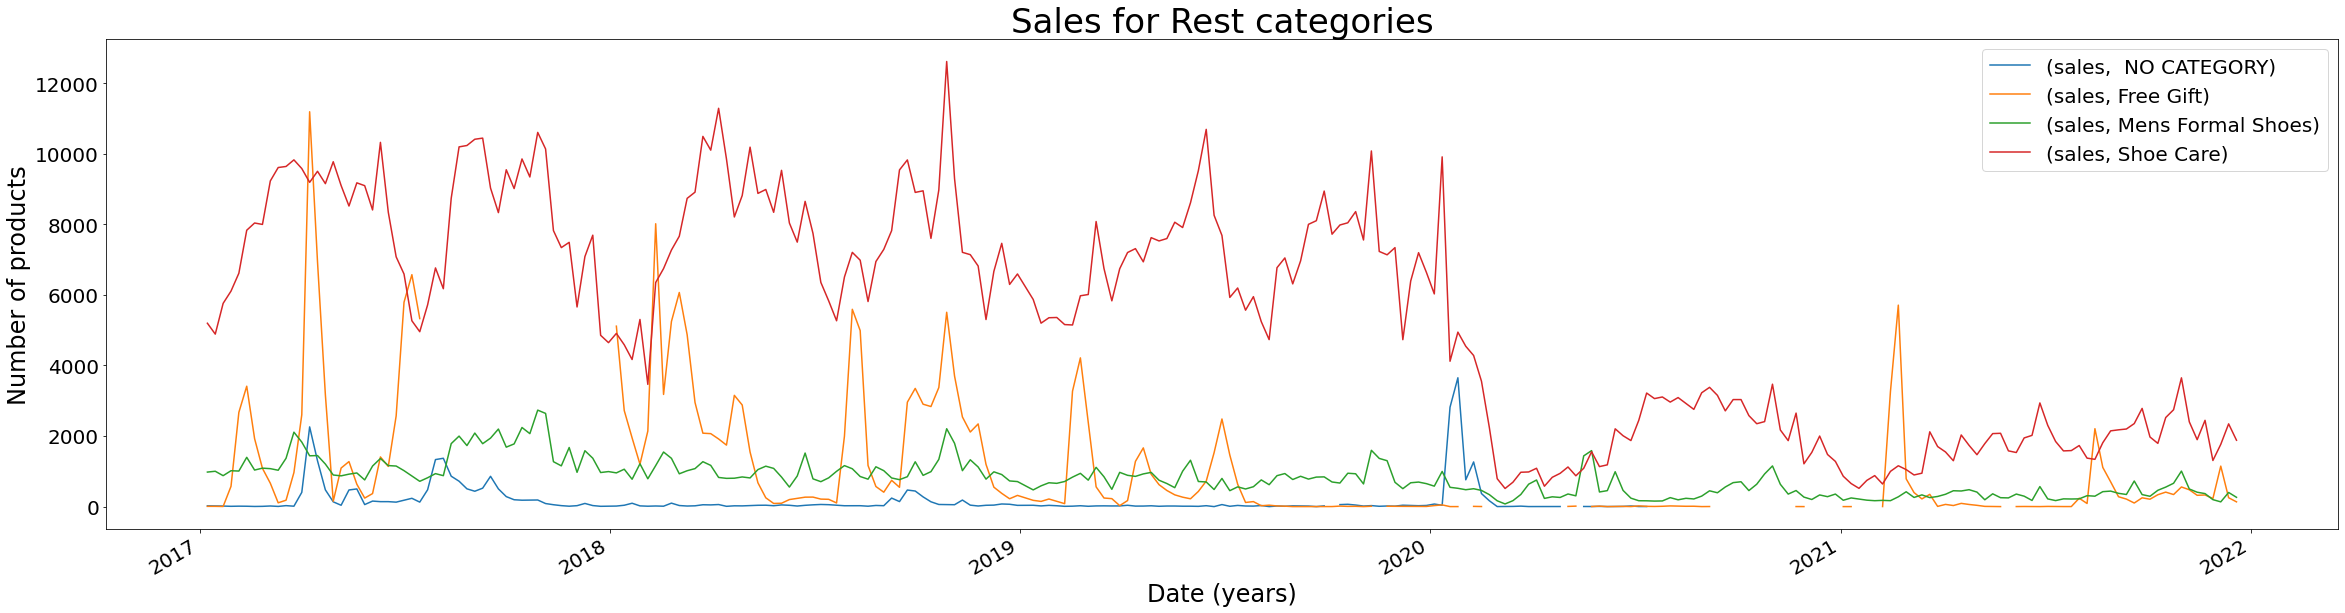

In [1353]:
plt.figure()
ax1 = data[(~data['WSSI Category'].str.contains('Womens'))&(~data['WSSI Category'].str.contains('Casual'))&(~data['WSSI Category'].str.contains('Acc'))&(~data['WSSI Category'].str.contains('Sandals'))&(~data['WSSI Category'].str.contains('Boots'))&(~data['WSSI Category'].str.contains('Goretex'))&(~data['WSSI Category'].str.contains('Slippers'))][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for Rest categories',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

We see for some of the categories the periodicity is remarkable. We can also see some categories have the same behaivour overtime. In order to have a better understanding of the different categories we will cluster them.

### Sales by month

In [30]:
datam = data
datam['month'] = pd.to_datetime(data['Date']).dt.month
datam

Description Seasonality  Year  Week    Channel        WSSI Category  \
1           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
3        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
5         Devotion          AW  2017     1  DE Direct      Womens Slippers   
6            Donna        CONT  2017     1  DE Direct  Womens Formal Shoes   
...            ...         ...   ...   ...        ...                  ...   
378111     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021    50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
1                          0.0        0.0          NONE    1.0  ...   
3                          0.0        0.0          NONE    1.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
5                          0.0        0.0          NONE    2.0  ...   
6                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
378111                     0.0        0.0  MANUFACTURED   20.0  ...   
378112                     0.0        0.0  MANUFACTURED   74.0  ...   
378113                     0.0        0.0  MANUFACTURED   83.0  ...   
378114                     0.0        0.0  MANUFACTURED   28.0  ...   
378115                     0.0        0.0  MANUFACTURED   34.0  ...   

       prev_sales4 prev_mean_price       Date      Price  Discount     Margin  \
1         0.000000        0.000000 2017-01-08  38.526679  0.000000  25.758448   
3         0.000000        0.000000 2017-01-08  58.225767  0.000000  44.100962   
4         0.000000        0.000000 2017-01-08  58.225767  0.000000  46.649675   
5         0.000000        0.000000 2017-01-08  26.457288  0.000000  17.882101   
6         0.000000        0.000000 2017-01-08  69.982735  0.000000  54.114939   
...            ...             ...        ...        ...       ...        ...   
378111   24.000000       52.500208 2021-12-19  52.500000  0.000000  29.532000   
378112   45.500000       50.162844 2021-12-19  45.586351  0.000000  25.807703   
378113   67.666667       54.624474 2021-12-19  54.996024  0.046867  35.907952   
378114   39.166667       25.832187 2021-12-19  29.170000  0.000000  14.480000   
378115    4.333333       28.005556 2021-12-19  24.524118  3.817647   9.834118   

              RRP   Markdown       Cost  month  
1       50.378410  11.851731  12.768232      1  
3       58.395499   0.169733  14.124805      1  
4       58.395499   0.169733  11.576091      1  
5       34.688819   8.231530   8.575187      1  
6       70.192570   0.209836  15.867796      1  
...           ...        ...        ...    ...  
378111  87.500000  35.000000  22.968000     12  
378112  70.833333  25.246982  19.778649     12  
378113  70.833333  15.790441  19.088072     12  
378114  49.166666  19.996666  14.690000     12  
378115  49.166666  20.824902  14.690000     12  

[324429 rows x 25 columns]

<AxesSubplot:xlabel='month'>

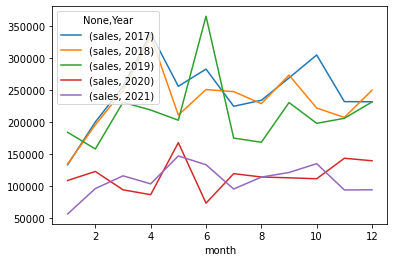

In [31]:
datam[['month','Year','sales']].groupby(['month','Year']).sum().unstack().plot()

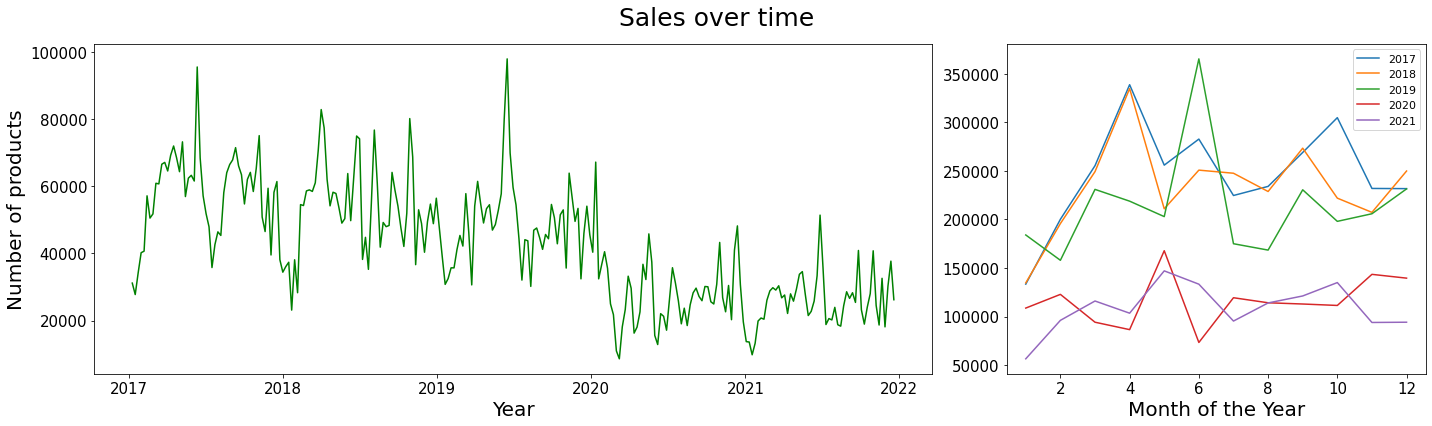

In [220]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6),gridspec_kw={'width_ratios': [6, 3]})
fig.suptitle('Sales over time', fontsize=25)
ax1.plot(data[['Date','sales']].groupby('Date').sum(), c='green')
ax1.set_ylabel('Number of products', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='both',labelsize=15)

ax2.plot(datam[['month','Year','sales']].groupby(['month','Year']).sum().unstack(), label=[2017,2018,2019,2020,2021])
ax2.set_xlabel('Month of the Year', fontsize=20)
ax2.tick_params(axis='both',labelsize=15)
ax2.legend(fontsize=11)


plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.7) 
plt.tight_layout()
plt.savefig('../Images/sales.png')
plt.show()

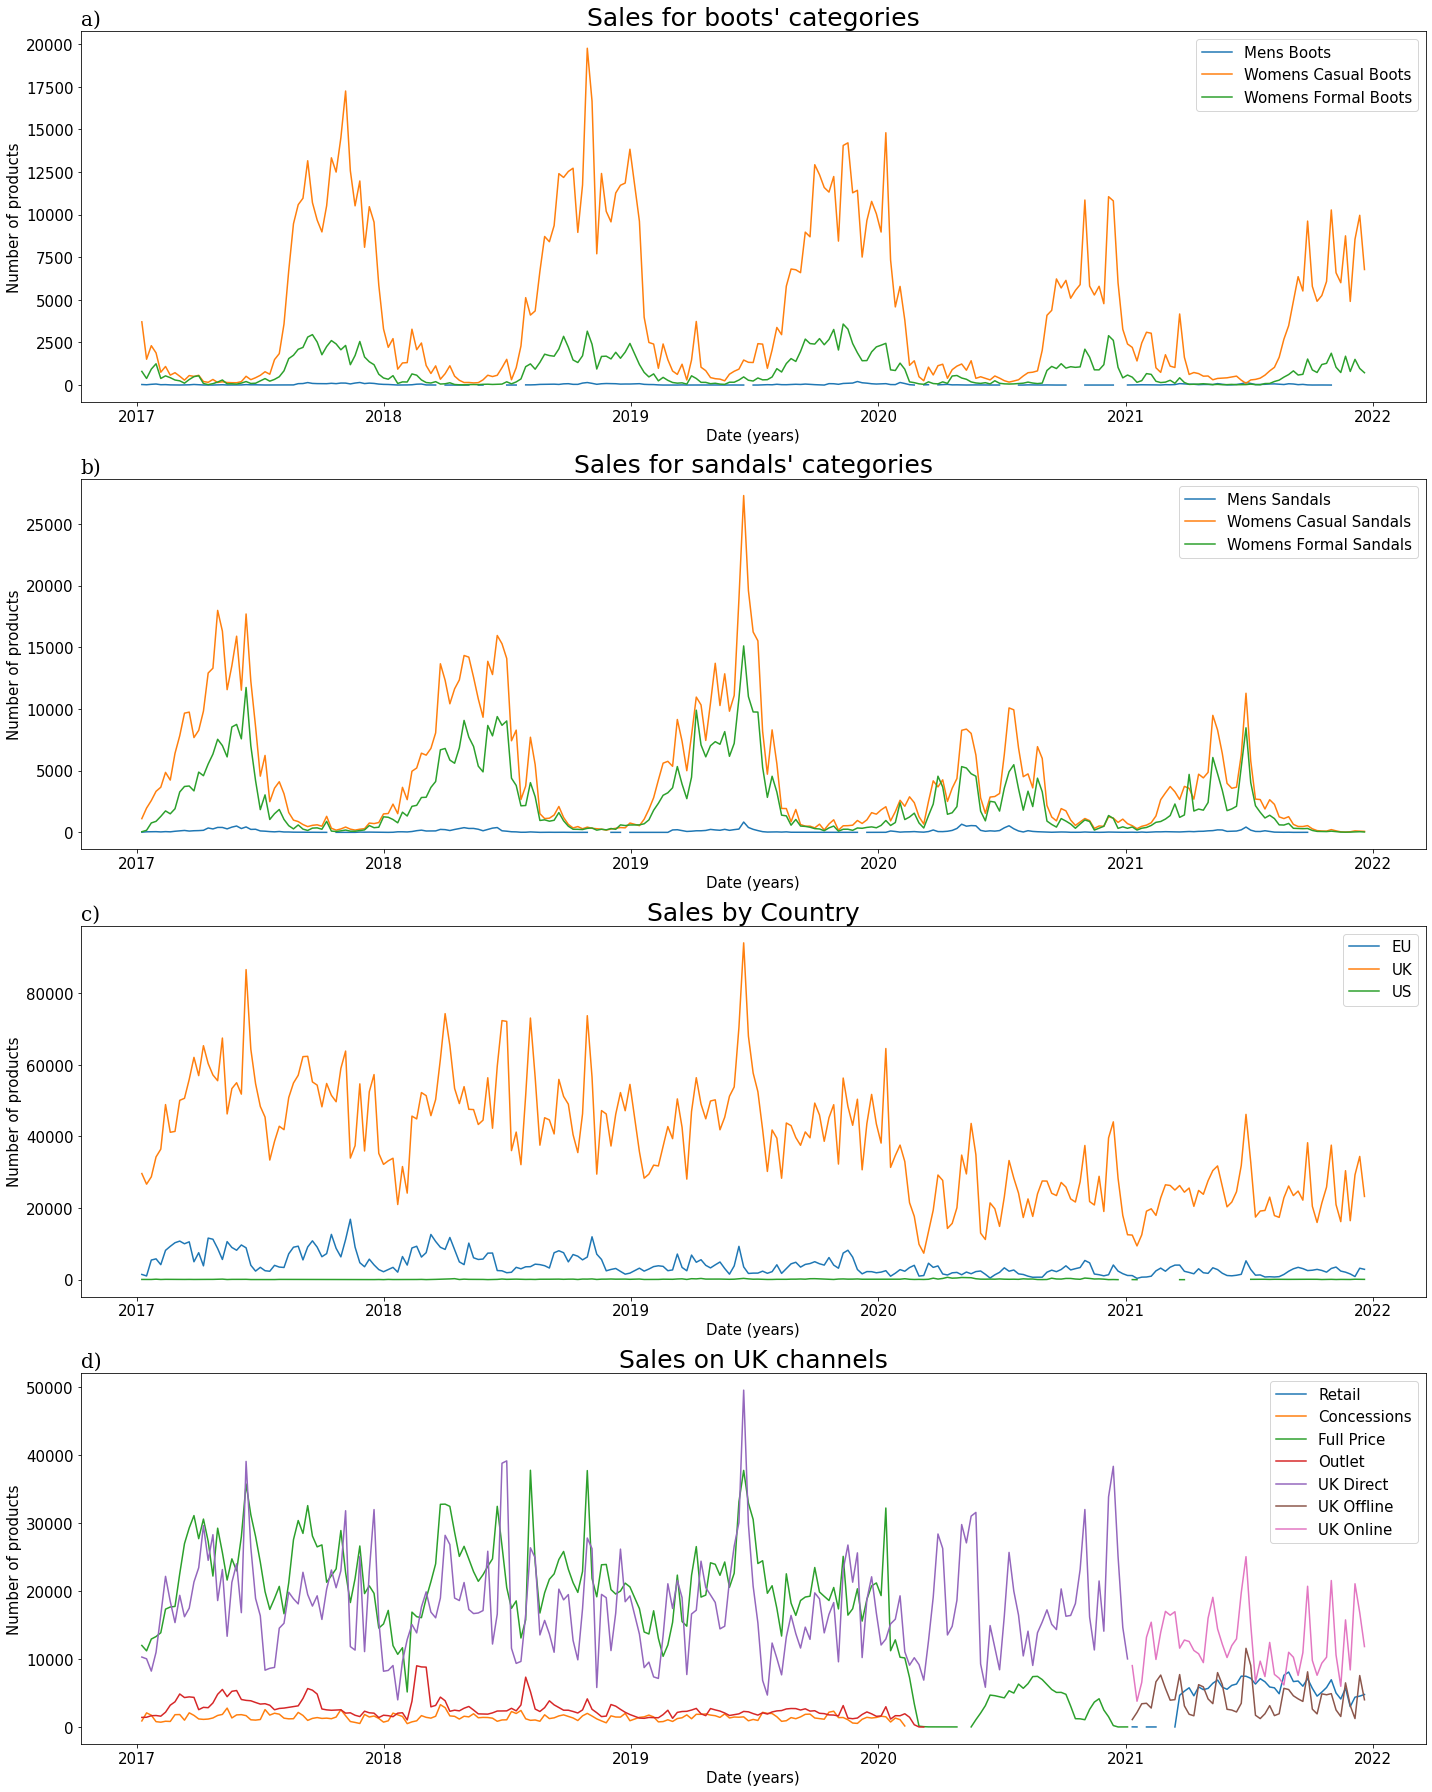

In [218]:
data_c = data
data_c['Channel2'] =  np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    'UK',
                                    'US',
                                    'EU'
                                ])



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(20,25))

#my_colors0 = [plt.cm.plasma(i / len(df.columns) / 2 + 0.5) for i in range(3)]

ax1.plot(data[data['WSSI Category'].str.contains('Boots')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Mens Boots','Womens Casual Boots','Womens Formal Boots'])
ax1.set_title("Sales for boots' categories",fontdict={'fontsize':25})
ax1.set_ylabel('Number of products',fontdict={'fontsize':15})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax1.legend(fontsize=15)
ax1.set_title('a)', fontfamily='serif', loc='left', fontsize=20)
ax1.tick_params(axis='both', labelsize=15)

ax2.plot(data[data['WSSI Category'].str.contains('Sandals')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Mens Sandals','Womens Casual Sandals','Womens Formal Sandals'])
ax2.set_title("Sales for sandals' categories",fontdict={'fontsize':25})
ax2.set_ylabel('Number of products',fontdict={'fontsize':15})
ax2.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax2.legend(fontsize=15)
ax2.set_title('b)', fontfamily='serif', loc='left', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)

ax3.plot(data[['Date','sales','Channel2']].groupby(['Date','Channel2']).sum().unstack(), label=['EU','UK','US'])
ax3.set_title("Sales by Country",fontdict={'fontsize':25})
ax3.set_ylabel('Number of products',fontdict={'fontsize':15})
ax3.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax3.legend(fontsize=15)
ax3.set_title('c)', fontfamily='serif', loc='left', fontsize=20)
ax3.tick_params(axis='both', labelsize=15)

ax4.plot(data[(data['Channel']!='Wholesale') & (data['Channel']!='Digital Partnerships') & (data['Channel2']=='UK')][['Date','sales','Channel']].groupby(['Date','Channel']).sum().unstack(), label=[
    'Retail','Concessions', 'Full Price',
       'Outlet', 'UK Direct',
       'UK Offline', 'UK Online'])
ax4.set_title('Sales on UK channels',fontdict={'fontsize':25})
ax4.set_ylabel('Number of products',fontdict={'fontsize':15})
ax4.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax4.legend(fontsize=15)
ax4.set_title('d)', fontfamily='serif', loc='left', fontsize=20)
ax4.tick_params(axis='both', labelsize=15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)  
plt.tight_layout()
plt.savefig('../Images/salescat.png')
plt.show()

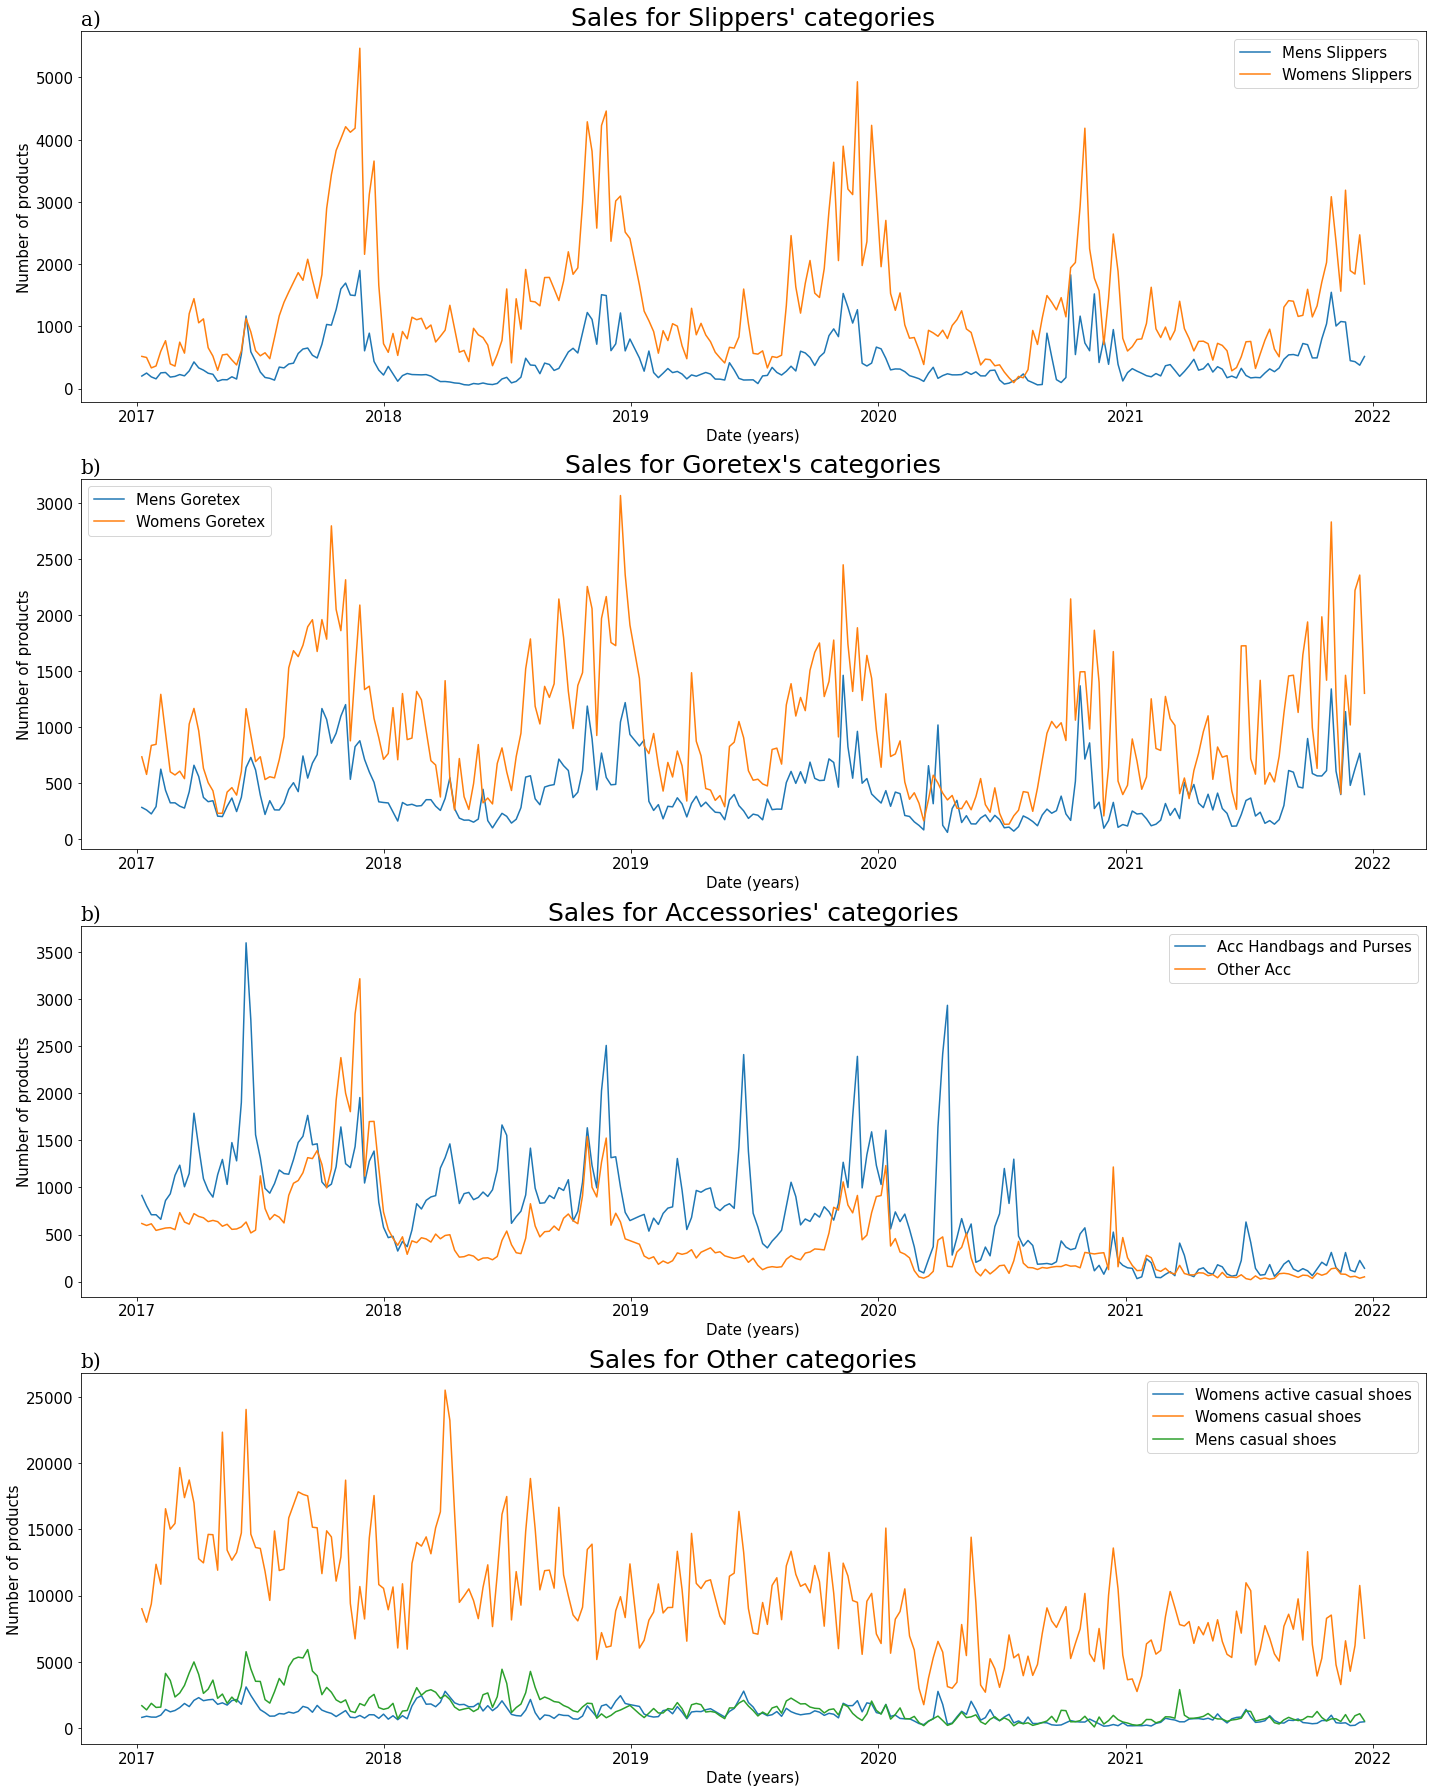

In [221]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(20,25))


ax1.plot(data[data['WSSI Category'].str.contains('Slippers')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Mens Slippers','Womens Slippers'])
ax1.set_title("Sales for Slippers' categories",fontdict={'fontsize':25})
ax1.set_ylabel('Number of products',fontdict={'fontsize':15})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax1.legend(fontsize=15)
ax1.set_title('a)', fontfamily='serif', loc='left', fontsize=20)
ax1.tick_params(axis='both', labelsize=15)

ax2.plot(data[data['WSSI Category'].str.contains('Goretex')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Mens Goretex','Womens Goretex'])
ax2.set_title("Sales for Goretex's categories",fontdict={'fontsize':25})
ax2.set_ylabel('Number of products',fontdict={'fontsize':15})
ax2.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax2.legend(fontsize=15)
ax2.set_title('b)', fontfamily='serif', loc='left', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)

ax3.plot(data[data['WSSI Category'].str.contains('Acc')][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Acc Handbags and Purses','Other Acc'])
ax3.set_title("Sales for Accessories' categories",fontdict={'fontsize':25})
ax3.set_ylabel('Number of products',fontdict={'fontsize':15})
ax3.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax3.legend(fontsize=15)
ax3.set_title('b)', fontfamily='serif', loc='left', fontsize=20)
ax3.tick_params(axis='both', labelsize=15)

ax4.plot(data[(data['WSSI Category'].str.contains('Casual'))&(~data['WSSI Category'].str.contains('Acc'))&(~data['WSSI Category'].str.contains('Sandals'))&(~data['WSSI Category'].str.contains('Boots'))&(~data['WSSI Category'].str.contains('Goretex'))&(~data['WSSI Category'].str.contains('Slippers'))][['Date','sales','WSSI Category']].groupby(['Date','WSSI Category']).sum().unstack(), label=['Womens active casual shoes','Womens casual shoes','Mens casual shoes'])
ax4.set_title("Sales for Other categories",fontdict={'fontsize':25})
ax4.set_ylabel('Number of products',fontdict={'fontsize':15})
ax4.set_xlabel('Date (years)',fontdict={'fontsize':15})
ax4.legend(fontsize=15)
ax4.set_title('b)', fontfamily='serif', loc='left', fontsize=20)
ax4.tick_params(axis='both', labelsize=15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3) 
plt.tight_layout()
plt.savefig('../Images/salescat_app.png')

## Clustering

### Clustering by Category

In [103]:
import os
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import tslearn
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

We first need to group the data to have one sale value per date for each category. And we need that all categories have all the dates filled.

In [137]:
df0 = data.groupby(['WSSI Category','Date'], as_index=False).sum()
df0 = df0.loc[:,['WSSI Category','Date','sales']]

df_full_index = pd.DataFrame(index=pd.MultiIndex.from_product( [df0["WSSI Category"].unique().tolist(), 
                                                                df0[df0['WSSI Category']=='Womens Casual Shoes']['Date']],
                                                                   names=['WSSI Category', 'Date'])).reset_index()
df1 = df_full_index.merge(df0,left_on=['WSSI Category', 'Date'],right_on=['WSSI Category', 'Date'],how="left")
df1 = df1.fillna(0)

In [138]:
mySeries = []
namesofMySeries = []
for category in df1['WSSI Category'].unique():
   
    df = df1[df1['WSSI Category']==category]
    df = df.loc[:,['Date','sales']]
    df.set_index("Date",inplace=True)
    df.sort_index(inplace=True)
    mySeries.append(df)
    namesofMySeries.append(category)

In [139]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

ind = 0
for series in mySeries:
    #print(ind, series.Date.min(), series.Date.max())
    ind+=1

{258}


In [140]:
max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series) == max_len:
        longest_series = series

In [141]:
problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)

In [142]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

In [143]:
nan_counter(mySeries)

0


Let's calculate what is the optimal number of clusters using the elbow method.

In [1215]:
#cluster_count = math.ceil(math.sqrt(len(mySeries))) 
distortions = []
K = range(1,22)
for k in K:

# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

    km = TimeSeriesKMeans(n_clusters=k, metric="dtw")

    labels = km.fit_predict(mySeries)

    distortions.append(km.inertia_)


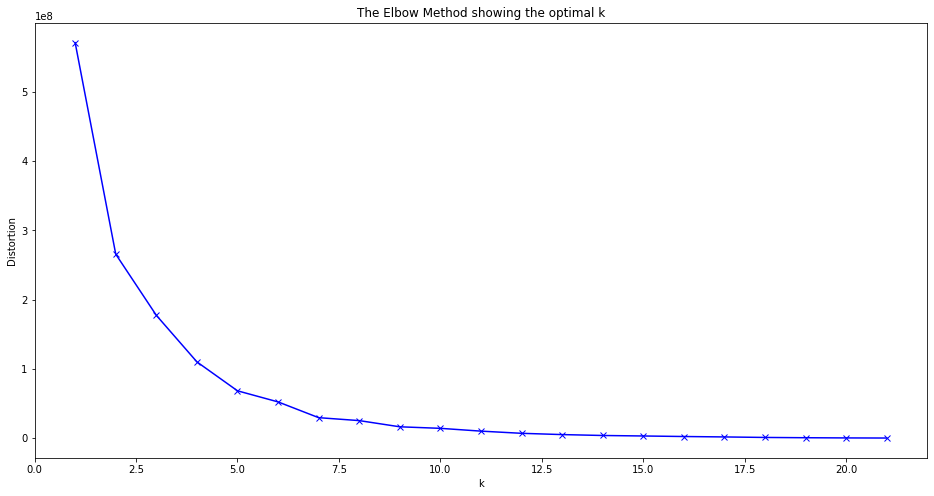

In [1216]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

There is not a clear optimal point but we will take 8 clusters.

In [144]:
#cluster_count = math.ceil(math.sqrt(len(mySeries))) 

cluster_count = 7
print(cluster_count)
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

7


In [145]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

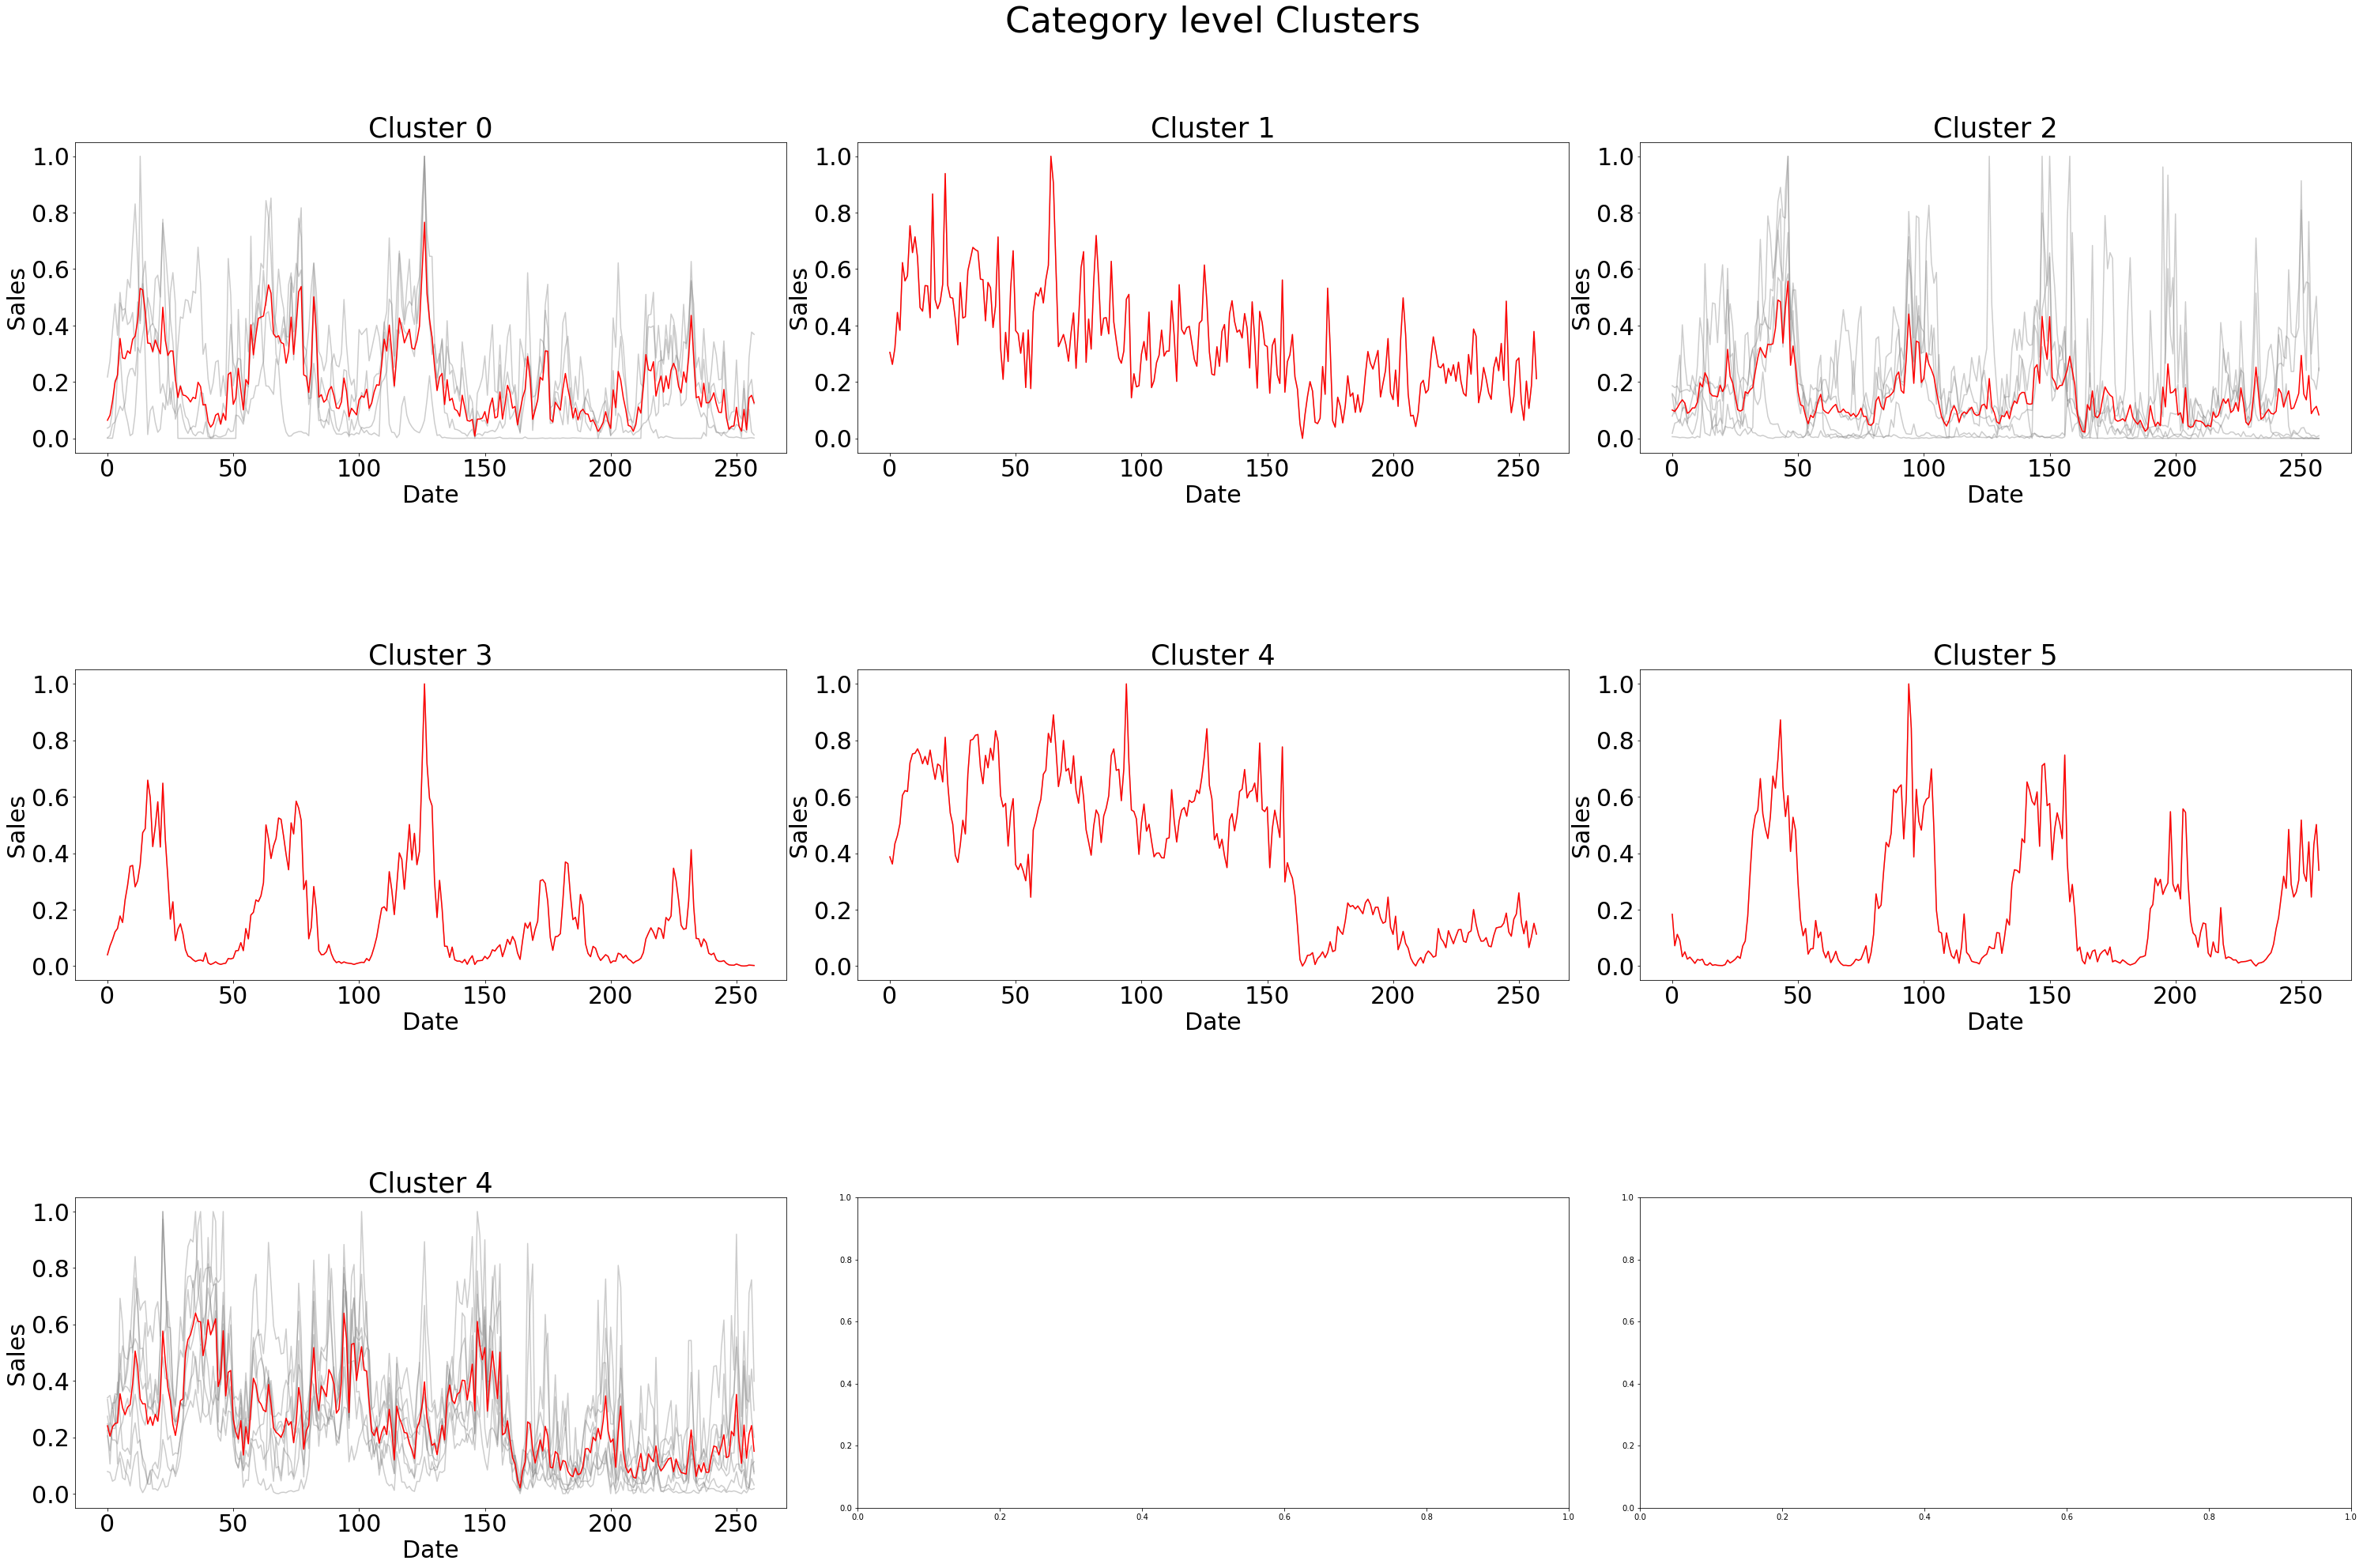

In [146]:
#plot_count = math.ceil(math.sqrt(cluster_count))
plot_count = 3
fig, axs = plt.subplots(3,3,figsize=(50,30))
fig.suptitle('Category level Clusters', fontsize=45)

row_i=0
column_j=0
r=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i+r+column_j), fontsize=35)
    axs[row_i, column_j].set_xlabel("Date", fontsize=30)
    axs[row_i, column_j].set_ylabel("Sales", fontsize=30)
    axs[row_i, column_j].tick_params(axis='both', labelsize=30)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        r = 2
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7) 


plt.savefig('../Images/catcluster.png')
plt.show()


In [1286]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
cat_clus = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster")
cat_clus = cat_clus.rename(columns={'Series':'WSSI Category','Cluster':'CategoryCluster'})
cat_clus

WSSI Category CategoryCluster
0                 NO CATEGORY       Cluster 0
19             Womens Goretex       Cluster 0
18        Womens Formal Shoes       Cluster 0
16        Womens Formal Boots       Cluster 0
20            Womens Slippers       Cluster 0
9           Other Accessories       Cluster 0
8               Mens Slippers       Cluster 0
21  Womens Smart Casual Shoes       Cluster 0
6                Mens Goretex       Cluster 0
5           Mens Formal Shoes       Cluster 0
4           Mens Casual Shoes       Cluster 0
3                  Mens Boots       Cluster 0
2                   Free Gift       Cluster 0
1     Acc Handbags and Purses       Cluster 0
7                Mens Sandals       Cluster 0
10                  Shoe Care       Cluster 1
17      Womens Formal Sandals       Cluster 2
14        Womens Casual Shoes       Cluster 3
12        Womens Casual Boots       Cluster 4
13      Womens Casual Sandals       Cluster 5
11        Womens Active Shoes       Cluster 6
15          Womens Deck Shoes       Cluster 6

The clustering obtained is not exactly what we expected but we will add this information into our dataframe to be tried in our models in the future.

In [1360]:
data = data.merge(cat_clus, how='left', on='WSSI Category')
data

Description Seasonality  Year  Week    Channel        WSSI Category  \
0           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
1        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
2            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
3         Devotion          AW  2017     1  DE Direct      Womens Slippers   
4            Donna        CONT  2017     1  DE Direct  Womens Formal Shoes   
...            ...         ...   ...   ...        ...                  ...   
324424     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
324425     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
324426     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
324427        Wrap          AW  2021    50  Wholesale      Womens Slippers   
324428        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
0                          0.0        0.0          NONE    1.0  ...   
1                          0.0        0.0          NONE    1.0  ...   
2                          0.0        0.0          NONE    1.0  ...   
3                          0.0        0.0          NONE    2.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
324424                     0.0        0.0  MANUFACTURED   20.0  ...   
324425                     0.0        0.0  MANUFACTURED   74.0  ...   
324426                     0.0        0.0  MANUFACTURED   83.0  ...   
324427                     0.0        0.0  MANUFACTURED   28.0  ...   
324428                     0.0        0.0  MANUFACTURED   34.0  ...   

             Date      Price  Discount     Margin        RRP   Markdown  \
0      2017-01-08  38.526679  0.000000  25.758448  50.378410  11.851731   
1      2017-01-08  58.225767  0.000000  44.100962  58.395499   0.169733   
2      2017-01-08  58.225767  0.000000  46.649675  58.395499   0.169733   
3      2017-01-08  26.457288  0.000000  17.882101  34.688819   8.231530   
4      2017-01-08  69.982735  0.000000  54.114939  70.192570   0.209836   
...           ...        ...       ...        ...        ...        ...   
324424 2021-12-19  52.500000  0.000000  29.532000  87.500000  35.000000   
324425 2021-12-19  45.586351  0.000000  25.807703  70.833333  25.246982   
324426 2021-12-19  54.996024  0.046867  35.907952  70.833333  15.790441   
324427 2021-12-19  29.170000  0.000000  14.480000  49.166666  19.996666   
324428 2021-12-19  24.524118  3.817647   9.834118  49.166666  20.824902   

             Cost month  Channel2  CategoryCluster  
0       12.768232     1        US        Cluster 6  
1       14.124805     1        US        Cluster 0  
2       11.576091     1        US        Cluster 3  
3        8.575187     1        US        Cluster 0  
4       15.867796     1        US        Cluster 0  
...           ...   ...       ...              ...  
324424  22.968000    12        UK        Cluster 4  
324425  19.778649    12        UK        Cluster 4  
324426  19.088072    12        UK        Cluster 4  
324427  14.690000    12        UK        Cluster 0  
324428  14.690000    12        UK        Cluster 0  

[324429 rows x 27 columns]

## Clustering at product level

Let's also apply the clustering at product level to understand or redifine our existing categories

In [166]:
df02 = data.groupby(['Description','Date'], as_index=False).sum()
df02 = df02.loc[:,['Description','Date','sales']]

df_full_index = pd.DataFrame(index=pd.MultiIndex.from_product( [df02["Description"].unique().tolist(), 
                                                                data['Date'].unique()],
                                                                   names=['Description', 'Date'])).reset_index()

df2 = df_full_index.merge(df02,left_on=['Description', 'Date'],right_on=['Description', 'Date'],how="left")
df2 = df2.fillna(0)

In [167]:
mySeries = []
namesofMySeries = []
for category in df2['Description'].unique():
   
    df = df2[df2['Description']==category]
    df = df.loc[:,['Date','sales']]
    df.set_index("Date",inplace=True)
    df.sort_index(inplace=True)
    mySeries.append(df)
    namesofMySeries.append(category)

In [168]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

ind = 0
for series in mySeries:
    #print(ind, series.Date.min(), series.Date.max())
    ind+=1

{258}


In [169]:
max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series) == max_len:
        longest_series = series

In [170]:
problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)

In [171]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

In [172]:
nan_counter(mySeries)

0


In [173]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


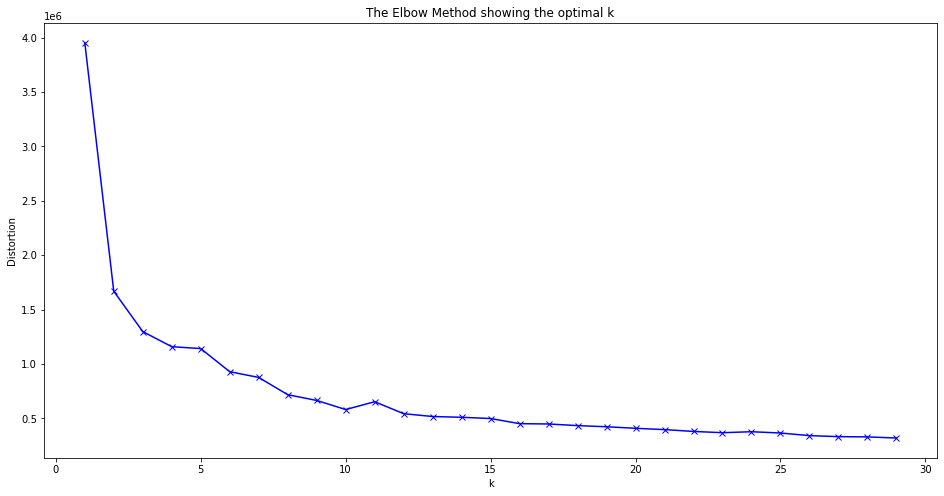

In [1235]:
#cluster_count = math.ceil(math.sqrt(len(mySeries))) 
distortions = []
K = range(1,30)
for k in K:
    print(k)

# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

    km = TimeSeriesKMeans(n_clusters=k, metric="dtw")

    labels = km.fit_predict(mySeries)

    distortions.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [174]:
#cluster_count = math.ceil(math.sqrt(len(mySeries))) 
cluster_count = 10
print(cluster_count)
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

10


In [175]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

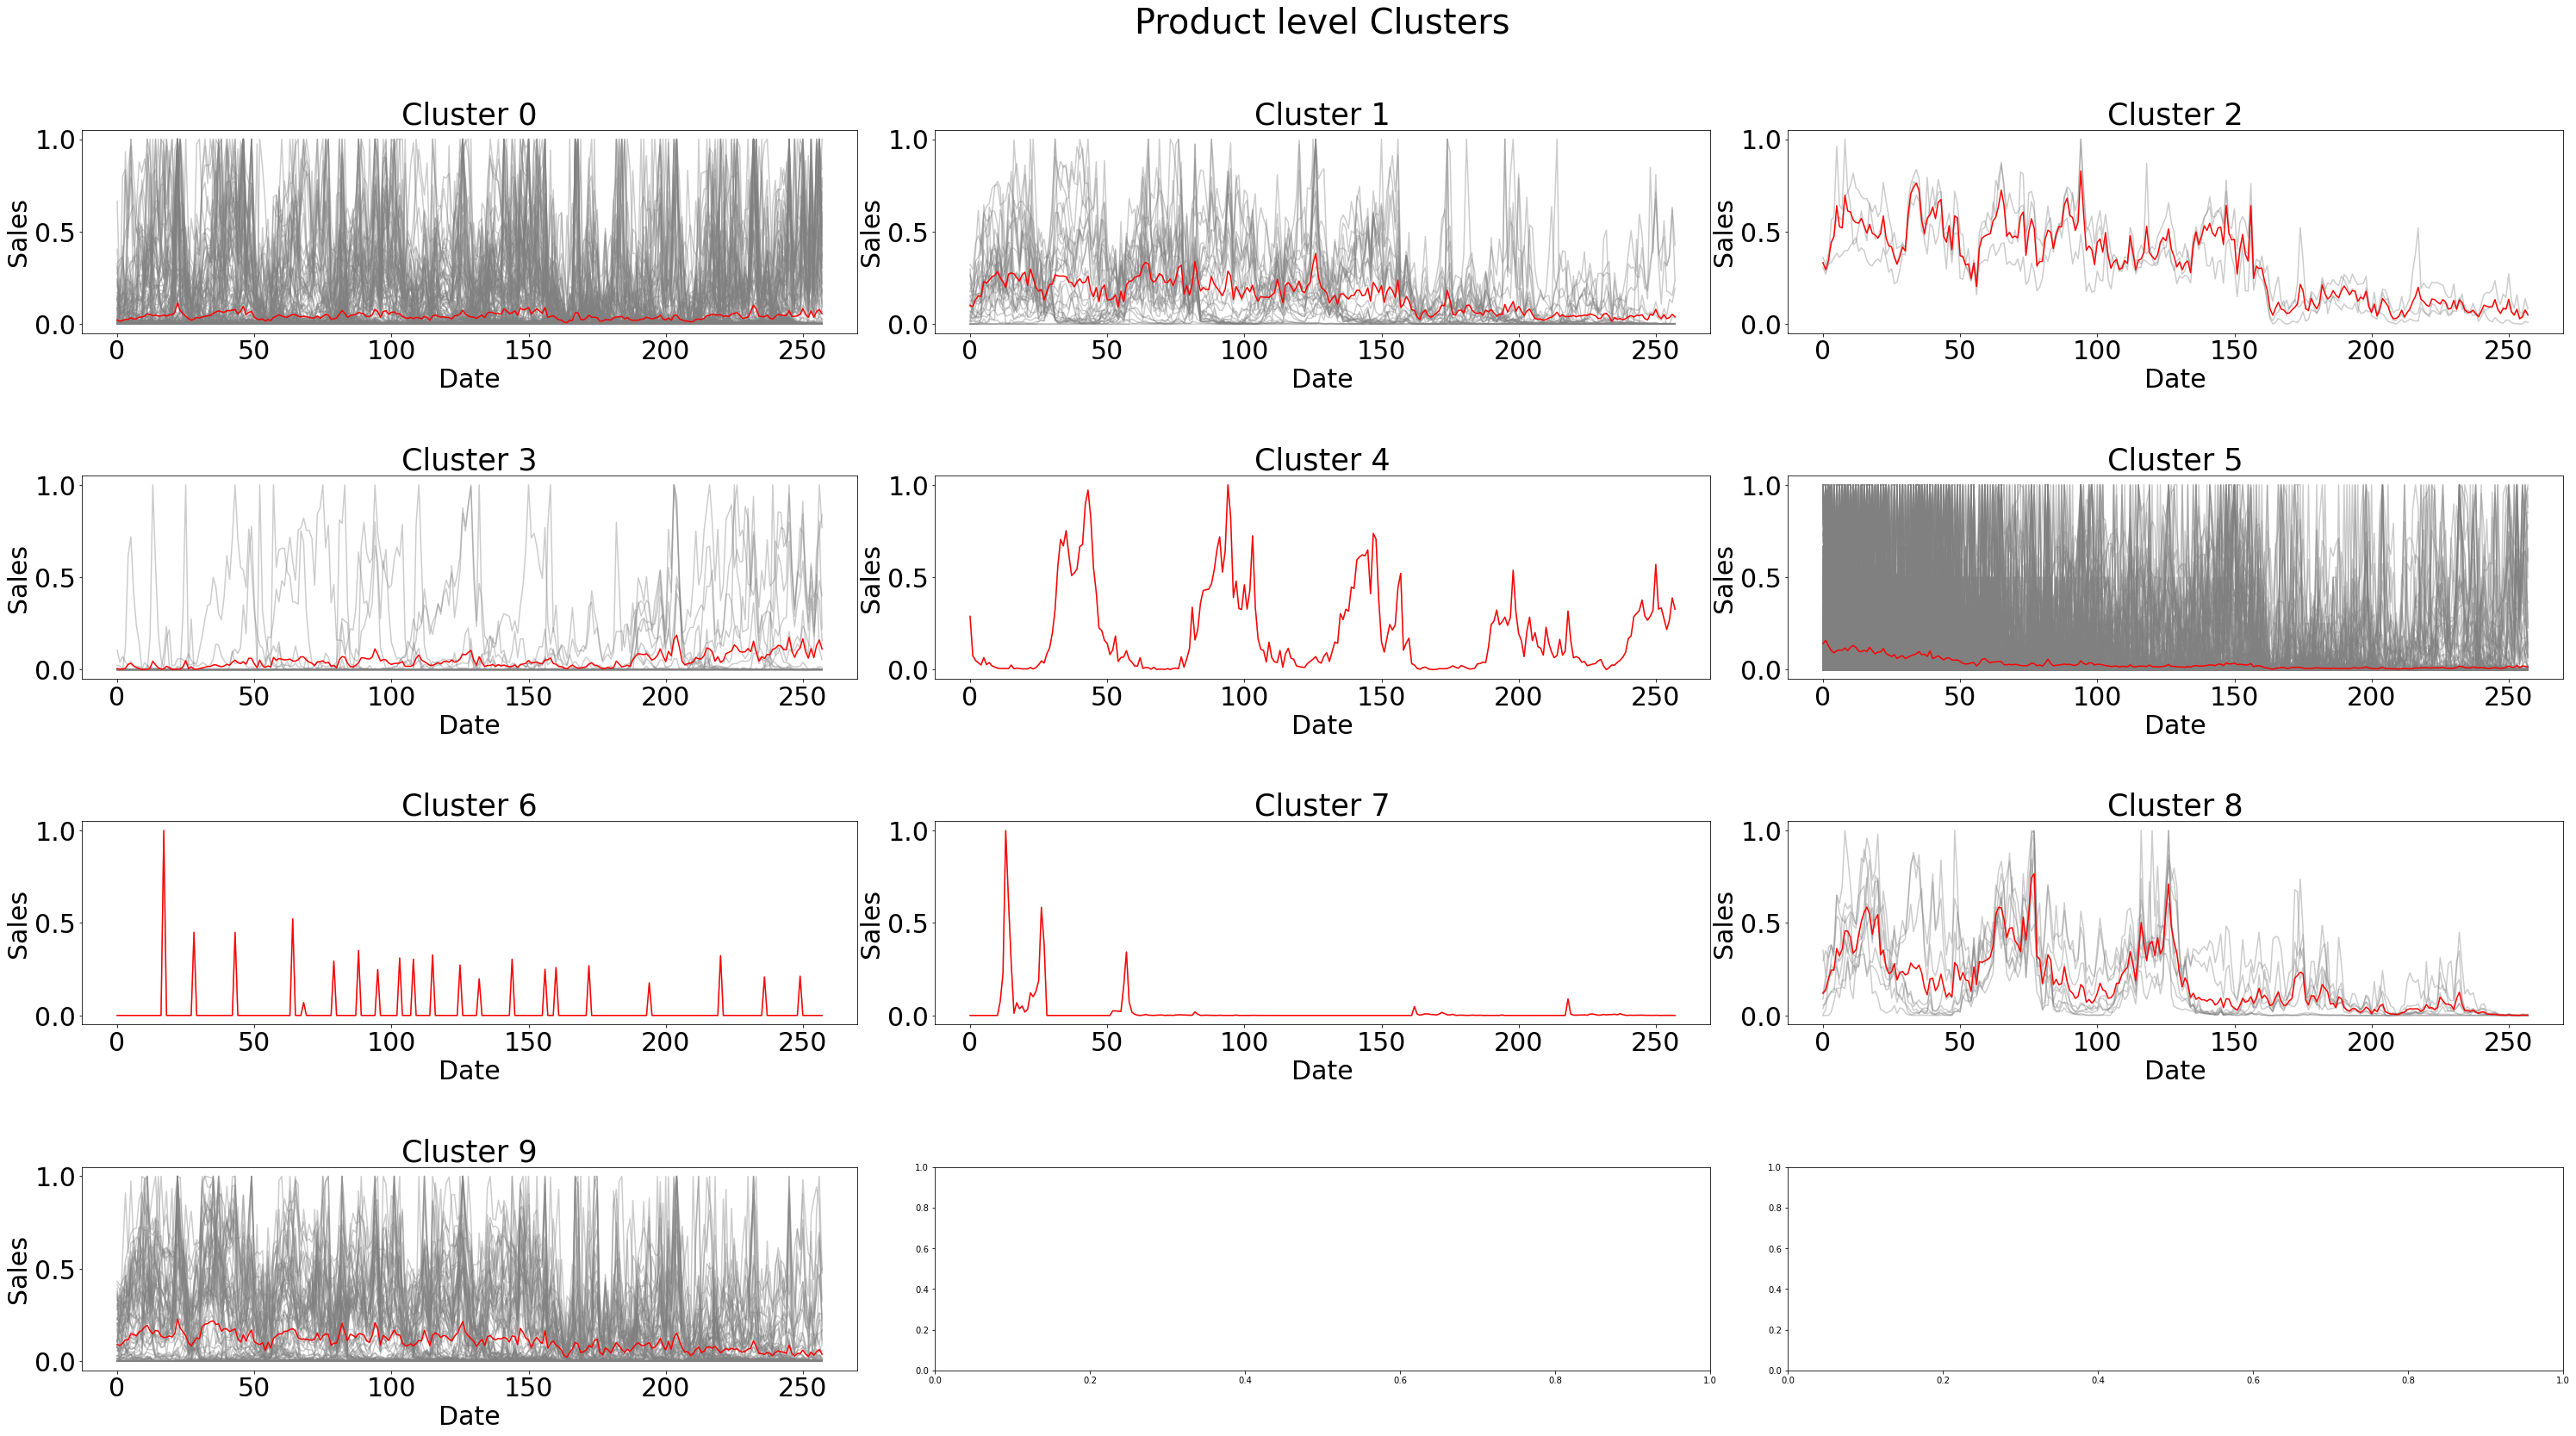

In [176]:
#plot_count = math.ceil(math.sqrt(cluster_count))
plot_count =3

fig, axs = plt.subplots(4,3,figsize=(50,25))
fig.suptitle('Product level Clusters', fontsize=40)
row_i=0
column_j=0
r=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].tick_params(axis='both', labelsize=30)
    axs[row_i, column_j].set_title("Cluster "+str(row_i+r+column_j), fontsize=35)
    axs[row_i, column_j].set_xlabel("Date", fontsize=30)
    axs[row_i, column_j].set_ylabel("Sales", fontsize=30)

    
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        r+=2

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7)

plt.savefig('../Images/Prodcluster.png')
plt.show()

In [1302]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
prod_clus = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster")
prod_clus = prod_clus.rename(columns={'Series':'Description','Cluster':'ProductCluster'})
prod_clus

Description ProductCluster
0    3Pk Sock Gift Box      Cluster 0
681               Lois      Cluster 0
682               Lola      Cluster 0
683             Lomand      Cluster 0
684             London      Cluster 0
..                 ...            ...
924             Resort      Cluster 7
944               Roam      Cluster 8
806            Nirvana      Cluster 8
348                Eva      Cluster 8
113            Blossom      Cluster 9

[1231 rows x 2 columns]

In [1361]:
data = data.merge(prod_clus, how='left', on='Description')
data

Description Seasonality  Year  Week    Channel        WSSI Category  \
0           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
1        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
2            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
3         Devotion          AW  2017     1  DE Direct      Womens Slippers   
4            Donna        CONT  2017     1  DE Direct  Womens Formal Shoes   
...            ...         ...   ...   ...        ...                  ...   
324424     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
324425     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
324426     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
324427        Wrap          AW  2021    50  Wholesale      Womens Slippers   
324428        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
0                          0.0        0.0          NONE    1.0  ...   
1                          0.0        0.0          NONE    1.0  ...   
2                          0.0        0.0          NONE    1.0  ...   
3                          0.0        0.0          NONE    2.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
324424                     0.0        0.0  MANUFACTURED   20.0  ...   
324425                     0.0        0.0  MANUFACTURED   74.0  ...   
324426                     0.0        0.0  MANUFACTURED   83.0  ...   
324427                     0.0        0.0  MANUFACTURED   28.0  ...   
324428                     0.0        0.0  MANUFACTURED   34.0  ...   

            Price  Discount     Margin        RRP   Markdown       Cost  \
0       38.526679  0.000000  25.758448  50.378410  11.851731  12.768232   
1       58.225767  0.000000  44.100962  58.395499   0.169733  14.124805   
2       58.225767  0.000000  46.649675  58.395499   0.169733  11.576091   
3       26.457288  0.000000  17.882101  34.688819   8.231530   8.575187   
4       69.982735  0.000000  54.114939  70.192570   0.209836  15.867796   
...           ...       ...        ...        ...        ...        ...   
324424  52.500000  0.000000  29.532000  87.500000  35.000000  22.968000   
324425  45.586351  0.000000  25.807703  70.833333  25.246982  19.778649   
324426  54.996024  0.046867  35.907952  70.833333  15.790441  19.088072   
324427  29.170000  0.000000  14.480000  49.166666  19.996666  14.690000   
324428  24.524118  3.817647   9.834118  49.166666  20.824902  14.690000   

        month Channel2  CategoryCluster  ProductCluster  
0           1       US        Cluster 6       Cluster 2  
1           1       US        Cluster 0       Cluster 2  
2           1       US        Cluster 3       Cluster 7  
3           1       US        Cluster 0       Cluster 2  
4           1       US        Cluster 0       Cluster 7  
...       ...      ...              ...             ...  
324424     12       UK        Cluster 4       Cluster 6  
324425     12       UK        Cluster 4       Cluster 4  
324426     12       UK        Cluster 4       Cluster 4  
324427     12       UK        Cluster 0       Cluster 2  
324428     12       UK        Cluster 0       Cluster 2  

[324429 rows x 28 columns]

we should check how many products we have on each of the clusters:

In [1240]:

dataa = data.groupby(['ProductCluster','Description']).count()
dataa.groupby('ProductCluster').count()

Seasonality  Year  Week  Channel  WSSI Category  \
ProductCluster                                                    
Cluster 0               775   775   775      775            775   
Cluster 1                10    10    10       10             10   
Cluster 2                40    40    40       40             40   
Cluster 3                 1     1     1        1              1   
Cluster 4               178   178   178      178            178   
Cluster 5                68    68    68       68             68   
Cluster 6                 7     7     7        7              7   
Cluster 7                 1     1     1        1              1   
Cluster 8                 2     2     2        2              2   
Cluster 9               149   149   149      149            149   

                LIMITED EDITION STYLES  Originals  Source  sales  gender  ...  \
ProductCluster                                                            ...   
Cluster 0                          775        775     775    775     775  ...   
Cluster 1                           10         10      10     10      10  ...   
Cluster 2                           40         40      40     40      40  ...   
Cluster 3                            1          1       1      1       1  ...   
Cluster 4                          178        178     178    178     178  ...   
Cluster 5                           68         68      68     68      68  ...   
Cluster 6                            7          7       7      7       7  ...   
Cluster 7                            1          1       1      1       1  ...   
Cluster 8                            2          2       2      2       2  ...   
Cluster 9                          149        149     149    149     149  ...   

                Discount  Margin  RRP  Markdown  Cost  CategoryCluster_x  \
ProductCluster                                                             
Cluster 0            775     775  775       775   775                775   
Cluster 1             10      10   10        10    10                 10   
Cluster 2             40      40   40        40    40                 40   
Cluster 3              1       1    1         1     1                  1   
Cluster 4            178     178  178       178   178                178   
Cluster 5             68      68   68        68    68                 68   
Cluster 6              7       7    7         7     7                  7   
Cluster 7              1       1    1         1     1                  1   
Cluster 8              2       2    2         2     2                  2   
Cluster 9            149     149  149       149   149                149   

                ProductCluster_x  CategoryCluster_y  ProductCluster_y  \
ProductCluster                                                          
Cluster 0                    775                775               775   
Cluster 1                     10                 10                10   
Cluster 2                     40                 40                40   
Cluster 3                      1                  1                 1   
Cluster 4                    178                178               178   
Cluster 5                     68                 68                68   
Cluster 6                      7                  7                 7   
Cluster 7                      1                  1                 1   
Cluster 8                      2                  2                 2   
Cluster 9                    149                149               149   

                CategoryCluster  
ProductCluster                   
Cluster 0                   775  
Cluster 1                    10  
Cluster 2                    40  
Cluster 3                     1  
Cluster 4                   178  
Cluster 5                    68  
Cluster 6                     7  
Cluster 7                     1  
Cluster 8                     2  
Cluster 9                   149  

[10 rows x 28 columns]

In [1362]:
data.to_csv('../Data/TFM_Hdataset_clean.csv')

## Best Categories and products
Categories with more data

In [1030]:
data['WSSI Category'].value_counts()

Womens Casual Shoes          69053
Womens Casual Sandals        24061
Womens Casual Boots          22540
Womens Formal Shoes          20428
Womens Active Shoes          19381
Acc Handbags and Purses      17795
Womens Smart Casual Shoes    17707
Shoe Care                    17668
Womens Formal Sandals        14798
Mens Casual Shoes            14638
Womens Deck Shoes            14028
Other Accessories            13177
Mens Formal Shoes            12093
Womens Slippers              11510
Womens Goretex               11377
Womens Formal Boots           9522
Mens Goretex                  5418
Mens Slippers                 4241
Free Gift                     1940
Mens Sandals                  1325
 NO CATEGORY                   932
Mens Boots                     771
Name: WSSI Category, dtype: int64

In [1031]:
data['WSSI Category'].nunique()

22

In [1032]:
data['Description'].nunique()

1231

Categories with more products

In [1033]:
datab = data.groupby(['WSSI Category','Description']).count()
datab.groupby('WSSI Category').count()

Seasonality  Year  Week  Channel  \
WSSI Category                                                 
 NO CATEGORY                       103   103   103      103   
Acc Handbags and Purses            126   126   126      126   
Free Gift                           19    19    19       19   
Mens Boots                           9     9     9        9   
Mens Casual Shoes                   67    67    67       67   
Mens Formal Shoes                   46    46    46       46   
Mens Goretex                        27    27    27       27   
Mens Sandals                        11    11    11       11   
Mens Slippers                       14    14    14       14   
Other Accessories                  164   164   164      164   
Shoe Care                           45    45    45       45   
Womens Active Shoes                 55    55    55       55   
Womens Casual Boots                 94    94    94       94   
Womens Casual Sandals               73    73    73       73   
Womens Casual Shoes                201   201   201      201   
Womens Deck Shoes                   29    29    29       29   
Womens Formal Boots                 49    49    49       49   
Womens Formal Sandals               58    58    58       58   
Womens Formal Shoes                104   104   104      104   
Womens Goretex                      35    35    35       35   
Womens Slippers                     38    38    38       38   
Womens Smart Casual Shoes           57    57    57       57   

                           LIMITED EDITION STYLES  Originals  Source  sales  \
WSSI Category                                                                 
 NO CATEGORY                                  103        103     103    103   
Acc Handbags and Purses                       126        126     126    126   
Free Gift                                      19         19      19     19   
Mens Boots                                      9          9       9      9   
Mens Casual Shoes                              67         67      67     67   
Mens Formal Shoes                              46         46      46     46   
Mens Goretex                                   27         27      27     27   
Mens Sandals                                   11         11      11     11   
Mens Slippers                                  14         14      14     14   
Other Accessories                             164        164     164    164   
Shoe Care                                      45         45      45     45   
Womens Active Shoes                            55         55      55     55   
Womens Casual Boots                            94         94      94     94   
Womens Casual Sandals                          73         73      73     73   
Womens Casual Shoes                           201        201     201    201   
Womens Deck Shoes                              29         29      29     29   
Womens Formal Boots                            49         49      49     49   
Womens Formal Sandals                          58         58      58     58   
Womens Formal Shoes                           104        104     104    104   
Womens Goretex                                 35         35      35     35   
Womens Slippers                                38         38      38     38   
Womens Smart Casual Shoes                      57         57      57     57   

                           gender  style  ...  prev_mean_price  Date  Price  \
WSSI Category                             ...                                 
 NO CATEGORY                  103    103  ...              103   103    103   
Acc Handbags and Purses       126    126  ...              126   126    126   
Free Gift                      19     19  ...               19    19     19   
Mens Boots                      9      9  ...                9     9      9   
Mens Casual Shoes              67     67  ...               67    67     67   
Mens Formal Shoes              46     46  ...               46  

best seller category

In [1034]:
data[['WSSI Category','sales']].groupby('WSSI Category').sum().sort_values(by='sales').tail(10)

sales
WSSI Category                       
Womens Slippers             353130.0
Womens Smart Casual Shoes   401854.0
Womens Formal Shoes         423866.0
Womens Deck Shoes           553383.0
Womens Formal Sandals       649223.0
Womens Active Shoes         695492.0
Womens Casual Boots        1105325.0
Womens Casual Sandals      1146887.5
Shoe Care                  1396513.5
Womens Casual Shoes        2539376.0

Products with more data

In [1035]:
data['Description'].value_counts().sort_values().tail(10)

Jewel       2575
Leap        2674
Mist GTX    2704
Wrap        2811
Donna       2814
Dew         2818
Whisper     2829
Leanne      2920
Tone        3261
Shake       4149
Name: Description, dtype: int64

In [1038]:
data

Description Seasonality  Year  Week    Channel        WSSI Category  \
1           Astrid         OLD  2017     1  DE Direct  Womens Active Shoes   
3        Charmaine          SS  2017     1  DE Direct  Womens Formal Shoes   
4            Chile          SS  2017     1  DE Direct  Womens Casual Shoes   
5         Devotion          AW  2017     1  DE Direct      Womens Slippers   
6            Donna        CONT  2017     1  DE Direct  Womens Formal Shoes   
...            ...         ...   ...   ...        ...                  ...   
378111     Waltham          AW  2021    50  Wholesale  Womens Casual Boots   
378112     Whisper          AW  2021    50  Wholesale  Womens Casual Boots   
378113     Whisper        CONT  2021    50  Wholesale  Womens Casual Boots   
378114        Wrap          AW  2021    50  Wholesale      Womens Slippers   
378115        Wrap        CONT  2021    50  Wholesale      Womens Slippers   

        LIMITED EDITION STYLES  Originals        Source  sales  ...  \
1                          0.0        0.0          NONE    1.0  ...   
3                          0.0        0.0          NONE    1.0  ...   
4                          0.0        0.0          NONE    1.0  ...   
5                          0.0        0.0          NONE    2.0  ...   
6                          0.0        0.0          NONE    1.0  ...   
...                        ...        ...           ...    ...  ...   
378111                     0.0        0.0  MANUFACTURED   20.0  ...   
378112                     0.0        0.0  MANUFACTURED   74.0  ...   
378113                     0.0        0.0  MANUFACTURED   83.0  ...   
378114                     0.0        0.0  MANUFACTURED   28.0  ...   
378115                     0.0        0.0  MANUFACTURED   34.0  ...   

       prev_mean_price       Date      Price  Discount     Margin        RRP  \
1             0.000000 2017-01-08  38.526679  0.000000  25.758448  50.378410   
3             0.000000 2017-01-08  58.225767  0.000000  44.100962  58.395499   
4             0.000000 2017-01-08  58.225767  0.000000  46.649675  58.395499   
5             0.000000 2017-01-08  26.457288  0.000000  17.882101  34.688819   
6             0.000000 2017-01-08  69.982735  0.000000  54.114939  70.192570   
...                ...        ...        ...       ...        ...        ...   
378111       52.500208 2021-12-17  52.500000  0.000000  29.532000  87.500000   
378112       50.162844 2021-12-17  45.586351  0.000000  25.807703  70.833333   
378113       54.624474 2021-12-17  54.996024  0.046867  35.907952  70.833333   
378114       25.832187 2021-12-17  29.170000  0.000000  14.480000  49.166666   
378115       28.005556 2021-12-17  24.524118  3.817647   9.834118  49.166666   

         Markdown       Cost  month  Channel2  
1       11.851731  12.768232      1        US  
3        0.169733  14.124805      1        US  
4        0.169733  11.576091      1        US  
5        8.231530   8.575187      1        US  
6        0.209836  15.867796      1        US  
...           ...        ...    ...       ...  
378111  35.000000  22.968000     12        UK  
378112  25.246982  19.778649     12        UK  
378113  15.790441  19.088072     12        UK  
378114  19.996666  14.690000     12        UK  
378115  20.824902  14.690000     12        UK  

[324403 rows x 26 columns]

Best Sellers:

In [1042]:
data[['Description','WSSI Category','sales']].groupby(['Description','WSSI Category']).sum().sort_values(by='sales').tail(50)

sales
Description                WSSI Category                      
Abbeyville                 Womens Smart Casual Shoes   52910.0
Brooke                     Womens Deck Shoes           55093.0
Ladies Imperfect A Sandals Womens Casual Sandals       58964.0
Lance                      Mens Formal Shoes           59016.0
Angel                      Womens Smart Casual Shoes   60563.0
Satin Touch Spray          Shoe Care                   60851.0
Dorset                     Womens Smart Casual Shoes   62759.0
Charmaine                  Womens Formal Shoes         62952.0
Assorted Worn Returns      Womens Casual Shoes         63112.0
Leanne II                  Womens Active Shoes         63432.0
Viviene                    Womens Formal Shoes         64354.0
Energise                   Mens Casual Shoes           66087.0
Devotion                   Womens Slippers             67827.0
Metallic Gel               Shoe Care                   70609.0
Chase                      Womens Deck Shoes           71538.0
Resort                     Womens Casual Sandals       72551.0
Ellery                     Womens Casual Boots         73783.0
Sunset                     Womens Casual Shoes         74099.0
Mystery                    Womens Casual Boots         74559.0
Hotter Women's Insoles     Shoe Care                   75216.0
Suede And Nubuck Brush     Shoe Care                   77059.0
Tropic                     Womens Formal Sandals       77680.0
Nirvana                    Womens Casual Shoes         79968.0
Relax                      Mens Slippers               80834.0
Maisie                     Womens Casual Sandals       81259.0
Pixie                      Womens Casual Boots         81284.0
Leap                       Womens Casual Shoes         82505.0
Quake                      Womens Casual Shoes         83156.0
Calypso                    Womens Casual Shoes         90072.0
Donna                      Womens Formal Shoes         96022.0
Daisy                      Womens Deck Shoes           98783.0
Dew                        Womens Casual Shoes        101940.0
Mist GTX                   Womens Goretex             102216.0
Mabel                      Womens Deck Shoes          108071.0
Gravity                    Womens Active Shoes        109935.0
Wrap                       Womens Slippers            111288.0
Tourist                    Womens Casual Sandals      113134.0
Sugar                      Womens Casual Shoes        120555.0
Flare                      Womens Formal Sandals      134055.0
Jewel                      Womens Casual Shoes        134243.0
Easy                       Womens Casual Sandals      137448.0
Sol                        Womens Formal Sandals      151693.0
Footwear Cleaner           Shoe Care                  154447.0
Ladies Imperfect A Shoes   Womens Casual Shoes        165654.0
Tone                       Womens Casual Shoes        173666.0
Leanne                     Womens Active Shoes        183948.0
Shake                      Womens Casual Shoes        280706.0
Renovating Cream           Shoe Care                  355059.5
Whisper                    Womens Casual Boots        362777.0
Fine Mist Protector Spray  Shoe Care                  371580.0

Most expensive products (mean)

In [437]:
data[['Description','Price']].groupby('Description').mean().sort_values(by='Price').tail(10)

Price
Description                   
Thor                 59.475962
Belle                60.818781
Briony               61.801211
Rutland GTX          62.255316
Moreland GTX         65.316077
Marlowe GTX          69.516606
Diamond              73.334000
Diamond Extra Wide   83.333333
Sparkle              98.437500
Sparkle Extra Wide  100.000000

In [519]:
data.columns

Index(['Description', 'Seasonality', 'Year', 'Week', 'Channel',
       'WSSI Category', 'LIMITED EDITION STYLES', 'Originals', 'Source',
       'sales', 'gender', 'style', 'prev_sales', 'prev_sales2', 'prev_sales3',
       'prev_sales4', 'prev_mean_price', 'Date', 'Price', 'Discount', 'Margin',
       'RRP', 'Markdown', 'Cost'],
      dtype='object')

### Channel

<Figure size 432x288 with 0 Axes>

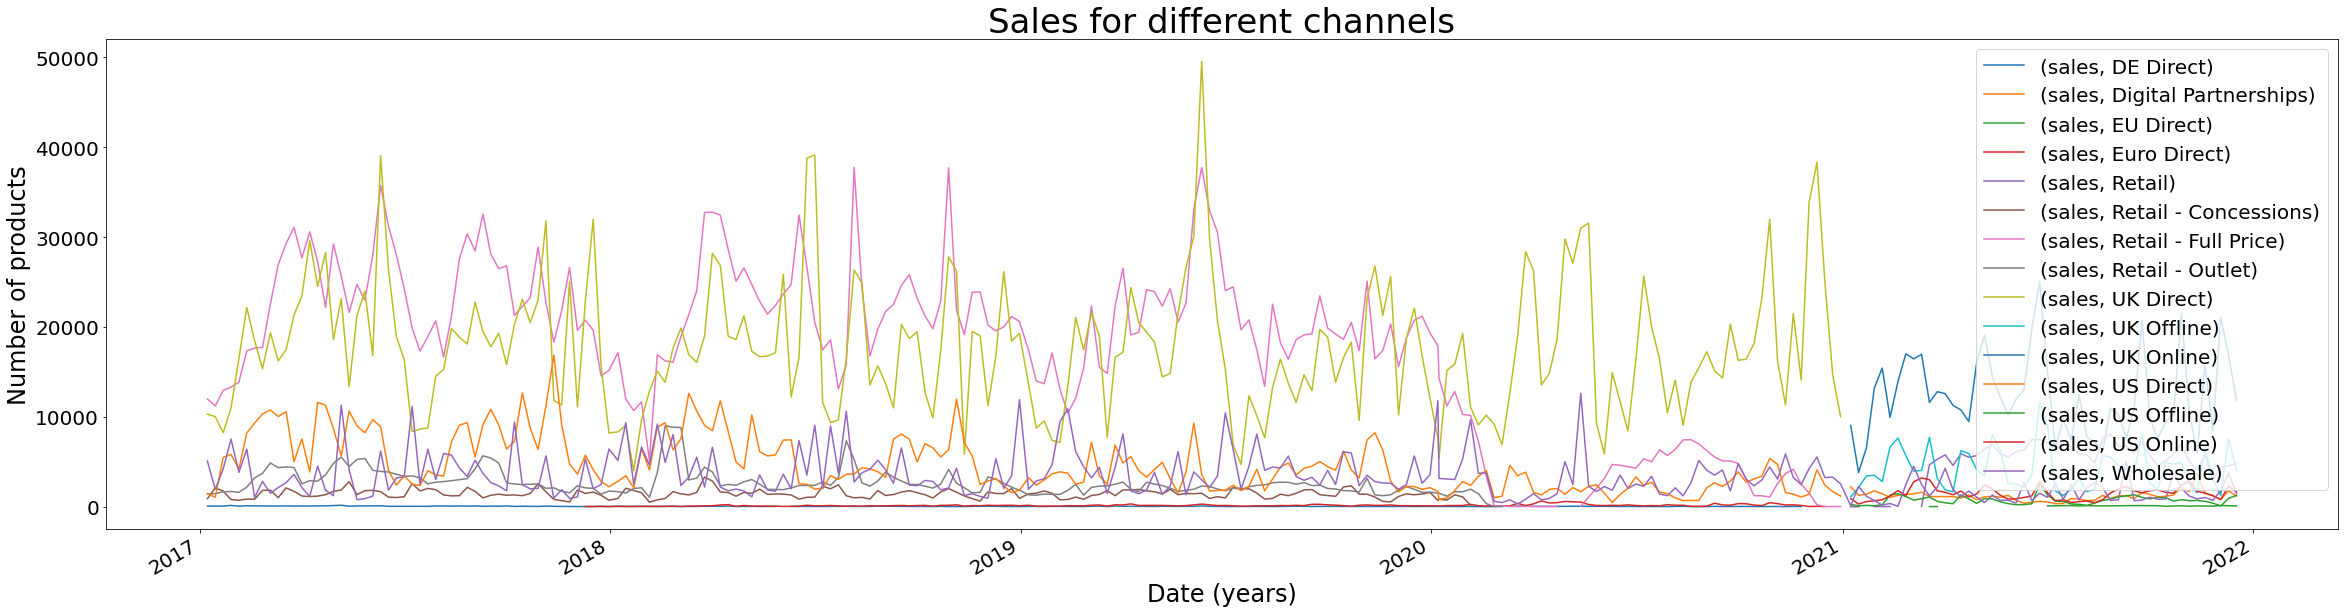

In [1043]:
plt.figure()
ax1 = data[['Date','sales','Channel']].groupby(['Date','Channel']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for different channels',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

<Figure size 432x288 with 0 Axes>

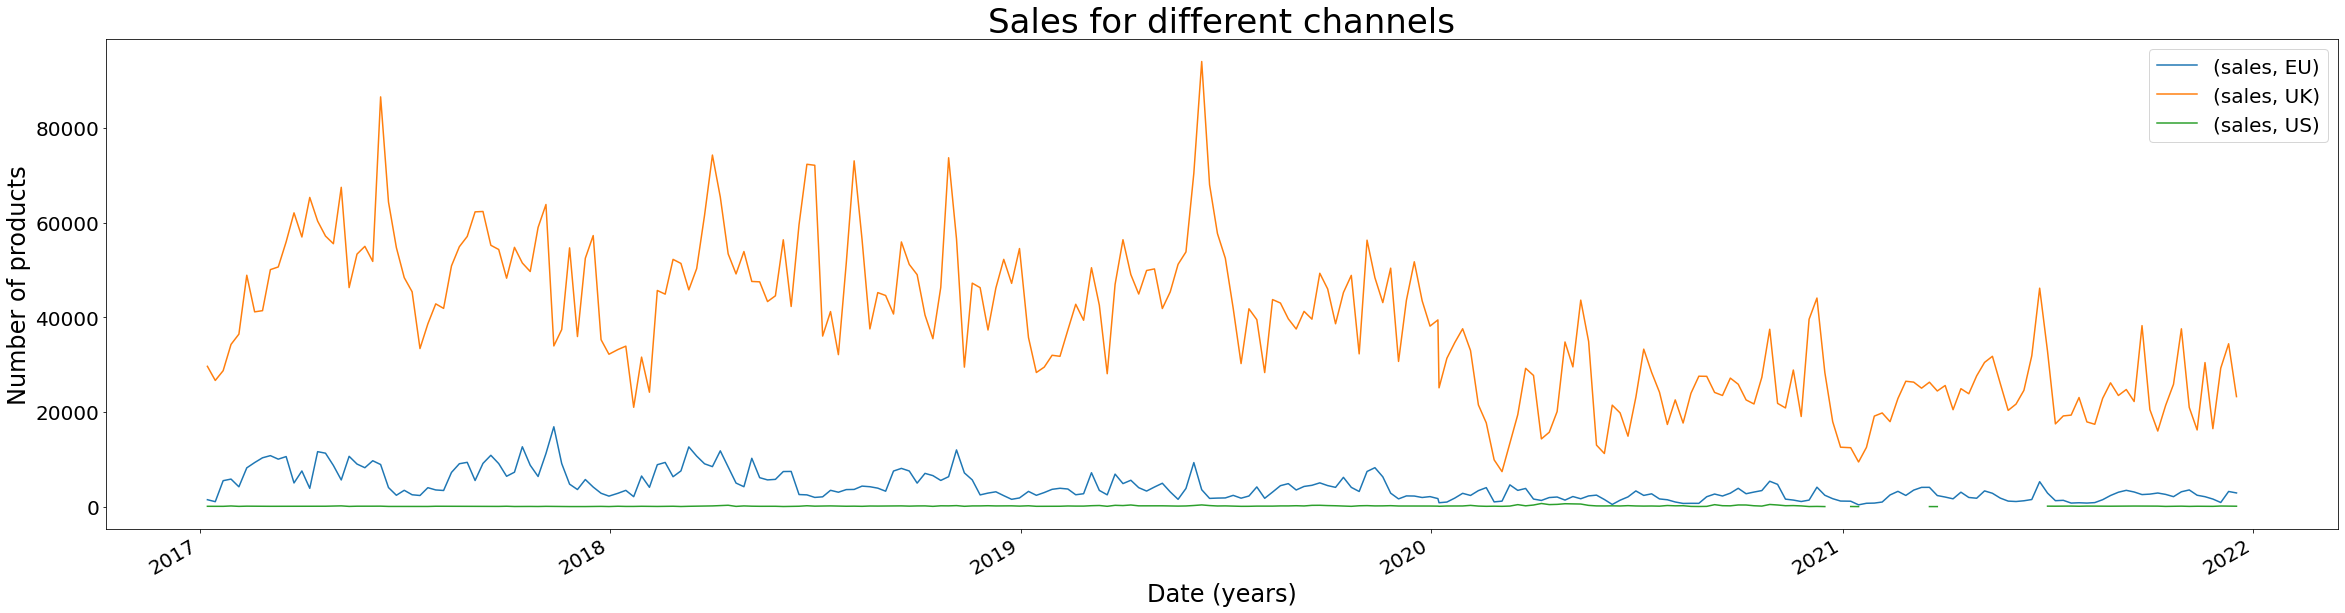

In [1044]:
data_c = data
data_c['Channel2'] =  np.select( [
                                    (data['Channel'].isin(channel_pound)),
                                    (data['Channel'].isin(channel_euro)),
                                    (data['Channel'].isin(channel_dollar))
                                ],[
                                    'UK',
                                    'US',
                                    'EU'
                                ])
plt.figure()
ax1 = data[['Date','sales','Channel2']].groupby(['Date','Channel2']).sum().unstack().plot(figsize=(40,10), fontsize=20)
ax1.set_title('Sales for different channels',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

In [1045]:
data['Channel2'].unique()

array(['US', 'UK', 'EU'], dtype=object)

<Figure size 432x288 with 0 Axes>

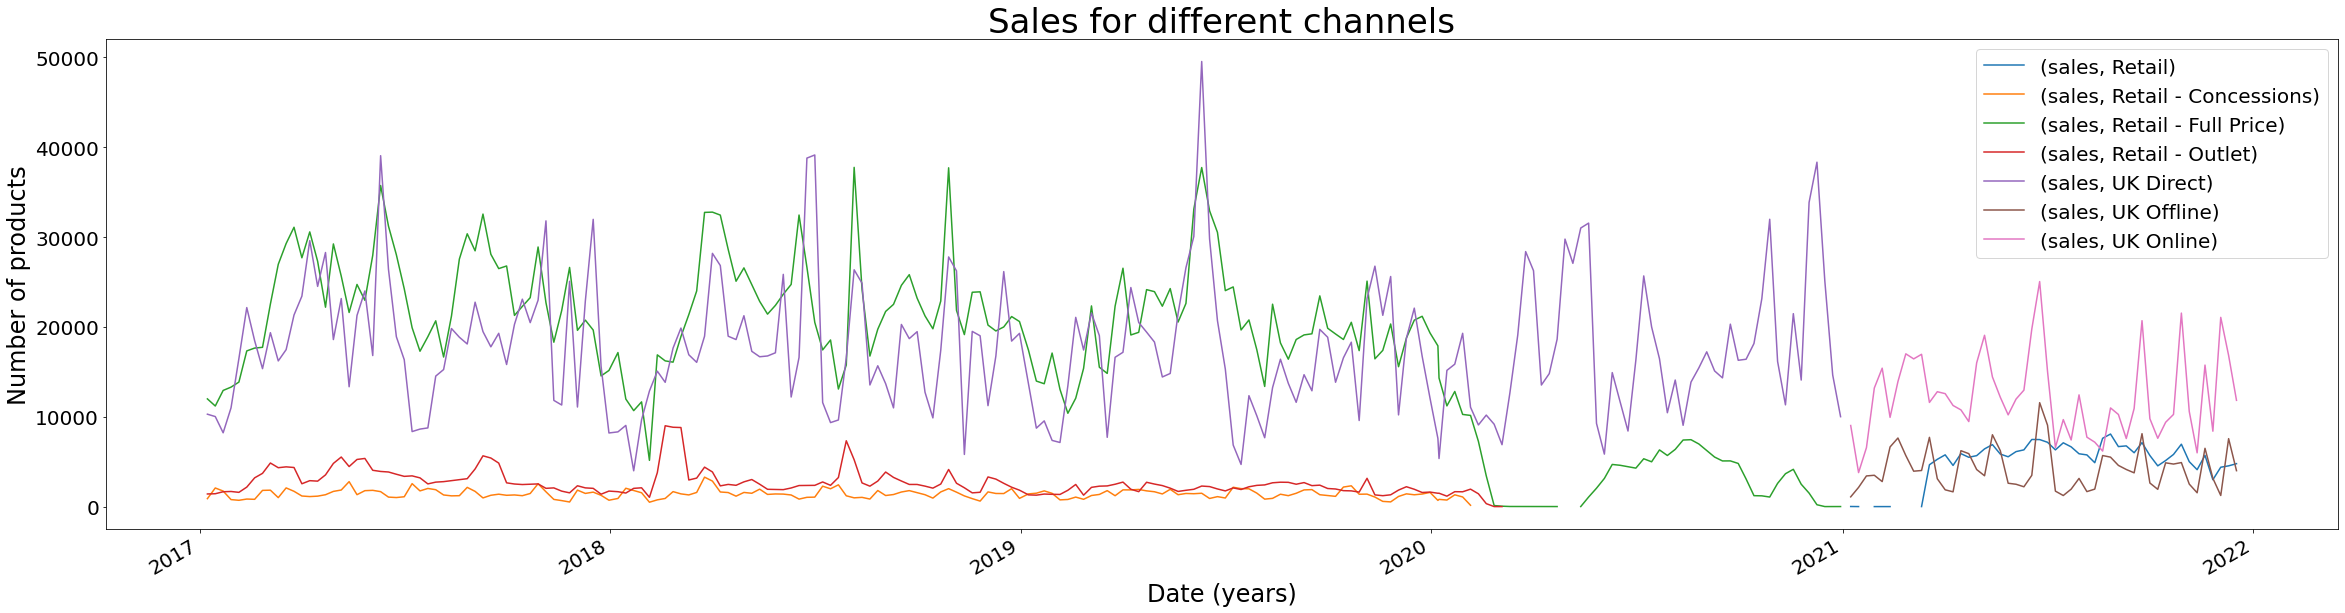

In [1050]:
plt.figure()
ax1 = data[(data['Channel']!='Wholesale') & (data['Channel']!='Digital Partnerships') & (data['Channel2']=='UK')][['Date','sales','Channel']].groupby(['Date','Channel']).sum().unstack().plot(figsize=(40,10), fontsize=20)
#ax1 = data[(data['Channel2']=='UK') ][['Date','sales','Channel']].groupby(['Date','Channel']).sum().unstack().plot(figsize=(40,10), fontsize=20)

ax1.set_title('Sales for different channels',fontdict={'fontsize':34})
ax1.set_ylabel('Number of products',fontdict={'fontsize':24})
ax1.set_xlabel('Date (years)',fontdict={'fontsize':24})
ax1.legend(fontsize=20)

Price versus sales plot

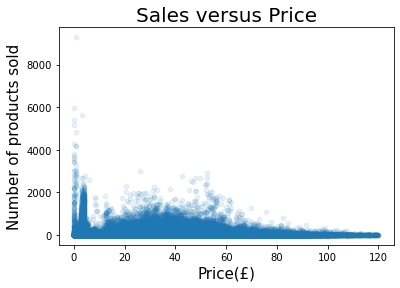

In [217]:
data.plot(x='Price', y='sales', kind='scatter', alpha=0.1)
plt.title('Sales versus Price',fontsize=20)
plt.xlabel('Price(£)',fontsize=15)
plt.ylabel('Number of products sold',fontsize=15)
plt.savefig('../Images/salesprice.png')

Text(0, 0.5, 'Number of products sold')

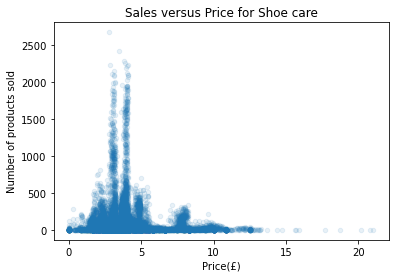

In [179]:
data[data['WSSI Category']=='Shoe Care'].plot(x='Price', y='sales', kind='scatter', alpha=0.1)
plt.title('Sales versus Price for Shoe care')
plt.xlabel('Price(£)')
plt.ylabel('Number of products sold')

<AxesSubplot:xlabel='Price', ylabel='sales'>

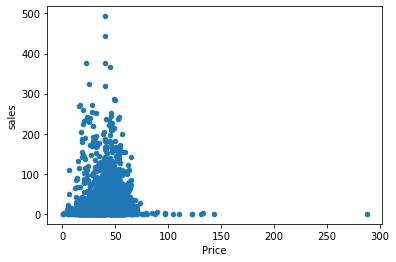

In [386]:
 #Astrid,Charmaine,Whisper
data[data['Description']=='Charmaine'].plot(x='Price', y='sales', kind='scatter' )